# Importing libraries required for this project 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# To save memory, I should convert the column types.

In [68]:
#converting types
df_types_conversion_numeric = {"assists": np.int8,"boosts": np.int8,"boosts": np.int8,"DBNOs": np.int8,"headshotKills": np.int8,
"heals": np.int8,"killPlace": np.int8,"killPoints": np.int16,"kills": np.int8,"killStreaks": np.int8,"matchDuration": np.int16,
"maxPlace": np.int8,"numGroups": np.int8,"rankPoints": np.int16,"revives": np.int8,"roadKills": np.int8,"teamKills": np.int8,
"vehicleDestroys": np.int8,"weaponsAcquired": np.int16,"winPoints": np.int16,"damageDealt": np.float32,"longestKill": np.float16,
"rideDistance": np.float16,"swimDistance": np.float16,"walkDistance": np.float16,"winPlacePerc": np.float16,"matchType": "category"
}
df2 = pd.read_csv("E:/Shay Ai/Shay_Projects/Data_sets/PUBG data/train_V2.csv", dtype=df_types_conversion_numeric)
print(f" ** Memory usage of the file - {sum(df2.memory_usage()) * 0.000001} MB for {len(df2.index)} Rows")

 ** Memory usage of the file - 280.15967 MB for 4446966 Rows


In [69]:
# columns that i dont need 
unwanted_columns = ["Id", "groupId","matchId","numGroups","matchDuration"]
data_columns = [columns for columns in list(df2.columns) if columns not in unwanted_columns]
#converts types
df_types_conversion_numeric = {"assists": np.int8,"boosts": np.int8,"boosts": np.int8,"DBNOs": np.int8,"headshotKills": np.int8,
"heals": np.int8,"killPlace": np.int8,"killPoints": np.int16,"kills": np.int8,"killStreaks": np.int8,"matchDuration": np.int16,
"maxPlace": np.int8,"numGroups": np.int8,"rankPoints": np.int16,"revives": np.int8,"roadKills": np.int8,"teamKills": np.int8,
"vehicleDestroys": np.int8,"weaponsAcquired": np.int16,"winPoints": np.int16,"damageDealt": np.float32,"longestKill": np.float32,
"rideDistance": np.float32,"swimDistance": np.float32,"walkDistance": np.float32,"winPlacePerc": np.float32,"matchType": "category"}
df3 = pd.read_csv("E:/Shay Ai/Shay_Projects/Data_sets/PUBG data/train_V2.csv", dtype=df_types_conversion_numeric, usecols=data_columns,chunksize=10000)
df = pd.concat(df3, ignore_index=True)
# df = df1.sample(1000000) # tooked sample of the data to increase speed of processing

# Droping_Duplicates

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
# so we have one data type object which is (matchtype) we can transform it into numrical by label encoder but we dont need it right now.
# we notic that we have one missing value on cloumn (winPlacePerc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4430231 entries, 0 to 4446965
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int8   
 1   boosts           int8   
 2   damageDealt      float32
 3   DBNOs            int8   
 4   headshotKills    int8   
 5   heals            int8   
 6   killPlace        int8   
 7   killPoints       int16  
 8   kills            int8   
 9   killStreaks      int8   
 10  longestKill      float32
 11  matchType        object 
 12  maxPlace         int8   
 13  rankPoints       int16  
 14  revives          int8   
 15  rideDistance     float32
 16  roadKills        int8   
 17  swimDistance     float32
 18  teamKills        int8   
 19  vehicleDestroys  int8   
 20  walkDistance     float32
 21  weaponsAcquired  int16  
 22  winPoints        int16  
 23  winPlacePerc     float32
dtypes: float32(6), int16(4), int8(13), object(1)
memory usage: 257.7+ MB


In [70]:
df.dropna(inplace=True)

In [12]:
df.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000000,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.800003,1,1466,0.4444
1,0,0,91.470001,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.000000,5,0,0.6400
2,1,0,68.000000,0,0,0,47,0,0,0,...,0,0.0000,0,0.00,0,0,161.800003,2,0,0.7755
3,0,0,32.900002,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.699997,3,0,0.1667
4,0,0,100.000000,0,0,0,45,0,1,1,...,0,0.0000,0,0.00,0,0,49.750000,2,0,0.1875


In [13]:
pd.set_option('float_format', '{:.3f}'.format)
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,...,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000,4430230.000
mean,0.235,1.111,131.121,0.660,0.228,1.375,47.468,506.628,0.928,0.546,...,0.165,608.382,0.004,4.526,0.024,0.008,1152.855,3.673,608.323,0.475
std,0.590,1.718,169.901,1.147,0.603,2.684,27.386,627.923,1.560,0.712,...,0.473,1498.336,0.074,30.293,0.168,0.093,1180.676,2.452,740.074,0.306
min,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,157.900,2.000,0.000,0.200
50%,0.000,0.000,85.040,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,693.400,3.000,0.000,0.461
75%,0.000,2.000,186.600,1.000,0.000,2.000,71.000,1173.000,1.000,1.000,...,0.000,3.019,0.000,0.000,0.000,0.000,1982.000,5.000,1495.000,0.742
max,22.000,33.000,6616.000,53.000,64.000,80.000,101.000,2170.000,72.000,20.000,...,39.000,40710.000,18.000,3823.000,12.000,5.000,25780.000,236.000,2013.000,1.000


# Brief About The Data

### DBNOs - Number of enemy players knocked.
### assists - Number of enemy players this player damaged that were killed by teammates.
### boosts - Number of boost items used.
### damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
### headshotKills - Number of enemy players killed with headshots.
### heals - Number of healing items used.
### Id - Player’s Id
### killPlace - Ranking in match of number of enemy players killed.
### killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
### killStreaks - Max number of enemy players killed in a short amount of time.
### kills - Number of enemy players killed.
### longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
### matchDuration - Duration of match in seconds.
### matchId - ID to identify match. There are no matches that are in both the training and testing set.
### matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
### rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
### revives - Number of times this player revived teammates.
### rideDistance - Total distance traveled in vehicles measured in meters.
### roadKills - Number of kills while in a vehicle.
### swimDistance - Total distance traveled by swimming measured in meters.
### teamKills - Number of times this player killed a teammate.
### vehicleDestroys - Number of vehicles destroyed.
### walkDistance - Total distance traveled on foot measured in meters.
### weaponsAcquired - Number of weapons picked up.
### winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
### groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
### numGroups - Number of groups we have data for in the match.
### maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
### winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# Strong Correlation Detection

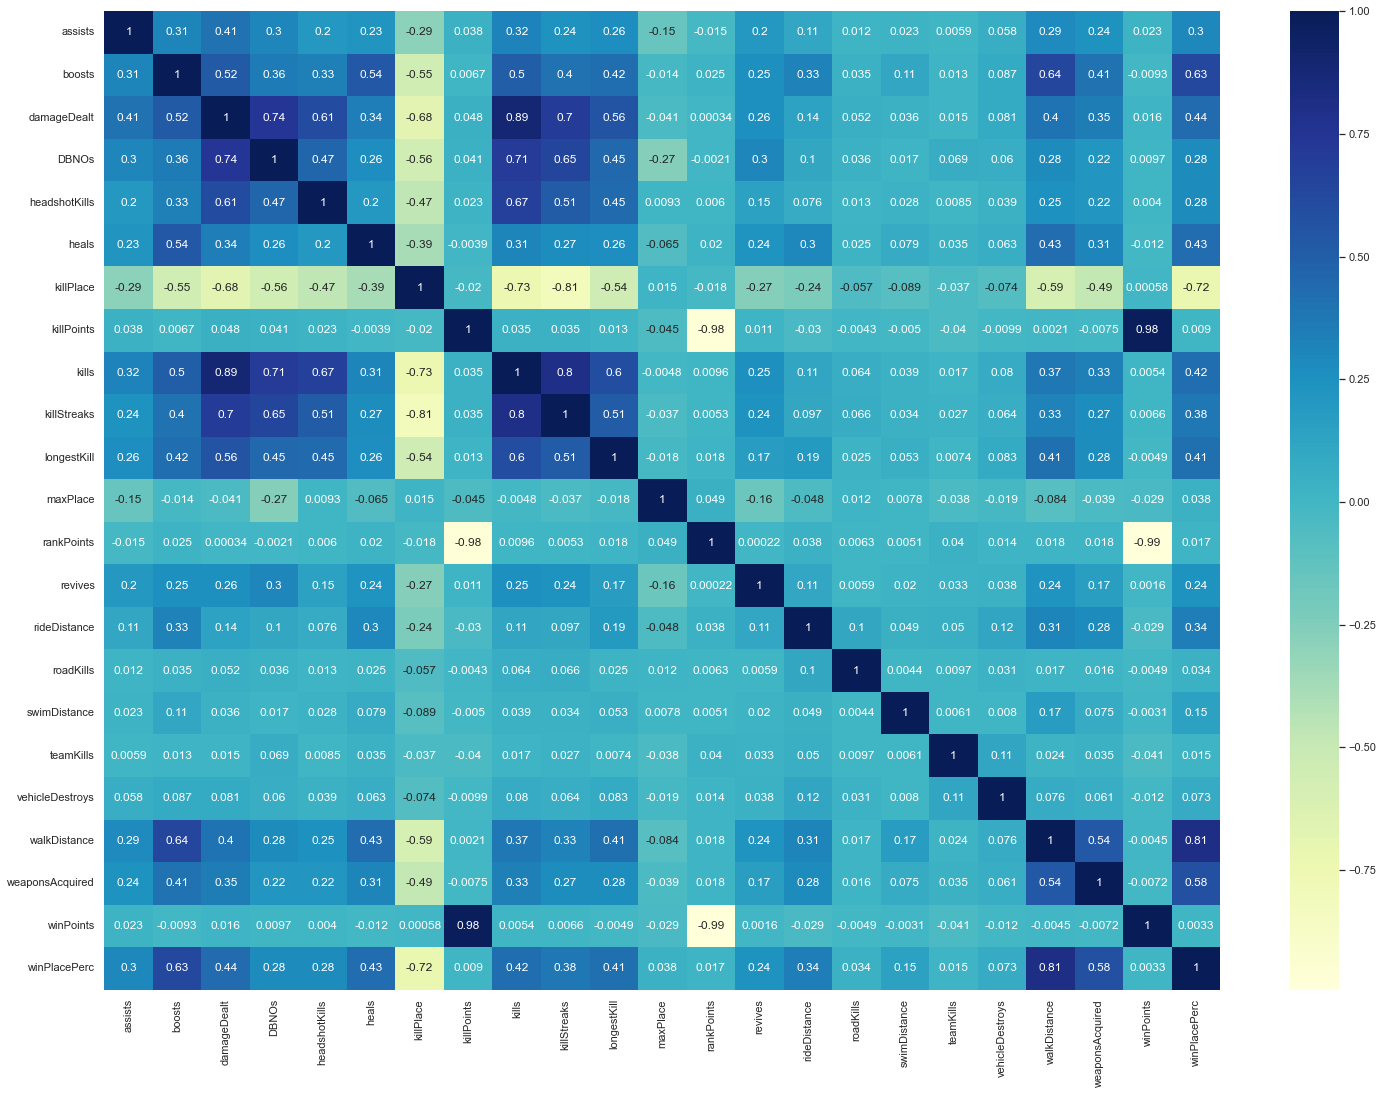

In [14]:
sns.set(rc = {'figure.figsize':(25,18)})
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()
# strong corr boost with [walkdistanc =.64,winplaceper=.63]
# strong corr damgeDealt with [dbnos=.74,headshotkills=.61,kills=.89,killstreaks=.7] why we have negative corr with killplace ??
# strong corr DBNOs with [kills=.71,killstreak=.65]
# strong corr headshotkills with kills=.67
# strong corr heals with [boost=.54,walkdistance=.43,winplaceper=.43]
# strong corr killplace with [winplaceper=-.72 , kills=-.73 , killstraek=-.81,damgedealt=-.68] 
# strong corr killpoint with winpoint=.98
# strong corr kill with [killstreak=.80,longestkill=.61]
# strong corr maxplace with [numgroups=1] why?? because they are identicals columns
# strong corr rankpoint with [killpoint =-.98,winpoint=-.99 ]
# strong corr walkdistance with [killplace=-.59,weaponsAcquired=.54,winplaceper=.81]
# strong corr weaponsAcquired with winplaceper=.58

# Checking null values on df 


In [15]:
#
df.isnull().sum()

assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchType          0
maxPlace           0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# Detecting Outliers (Skewness)

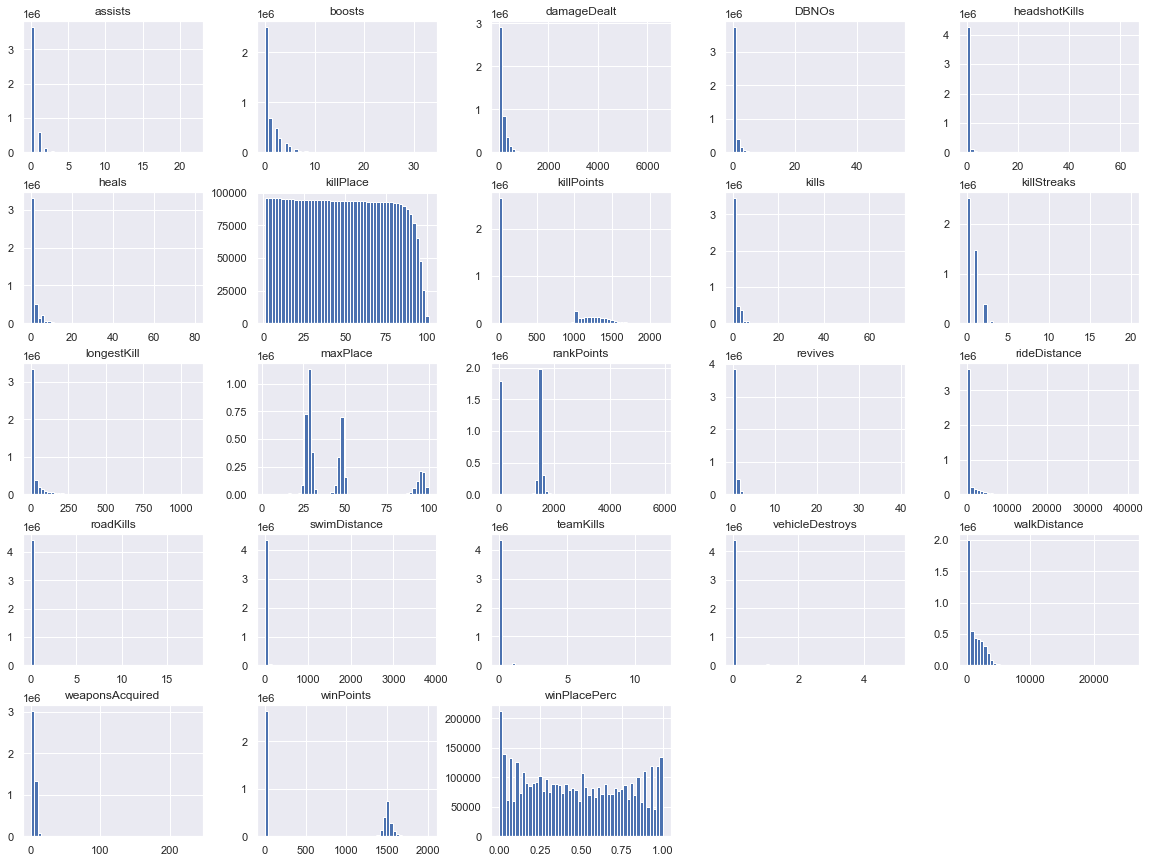

In [11]:
df.hist(bins=50, figsize=(20,15));

assists
3.559816401542315


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


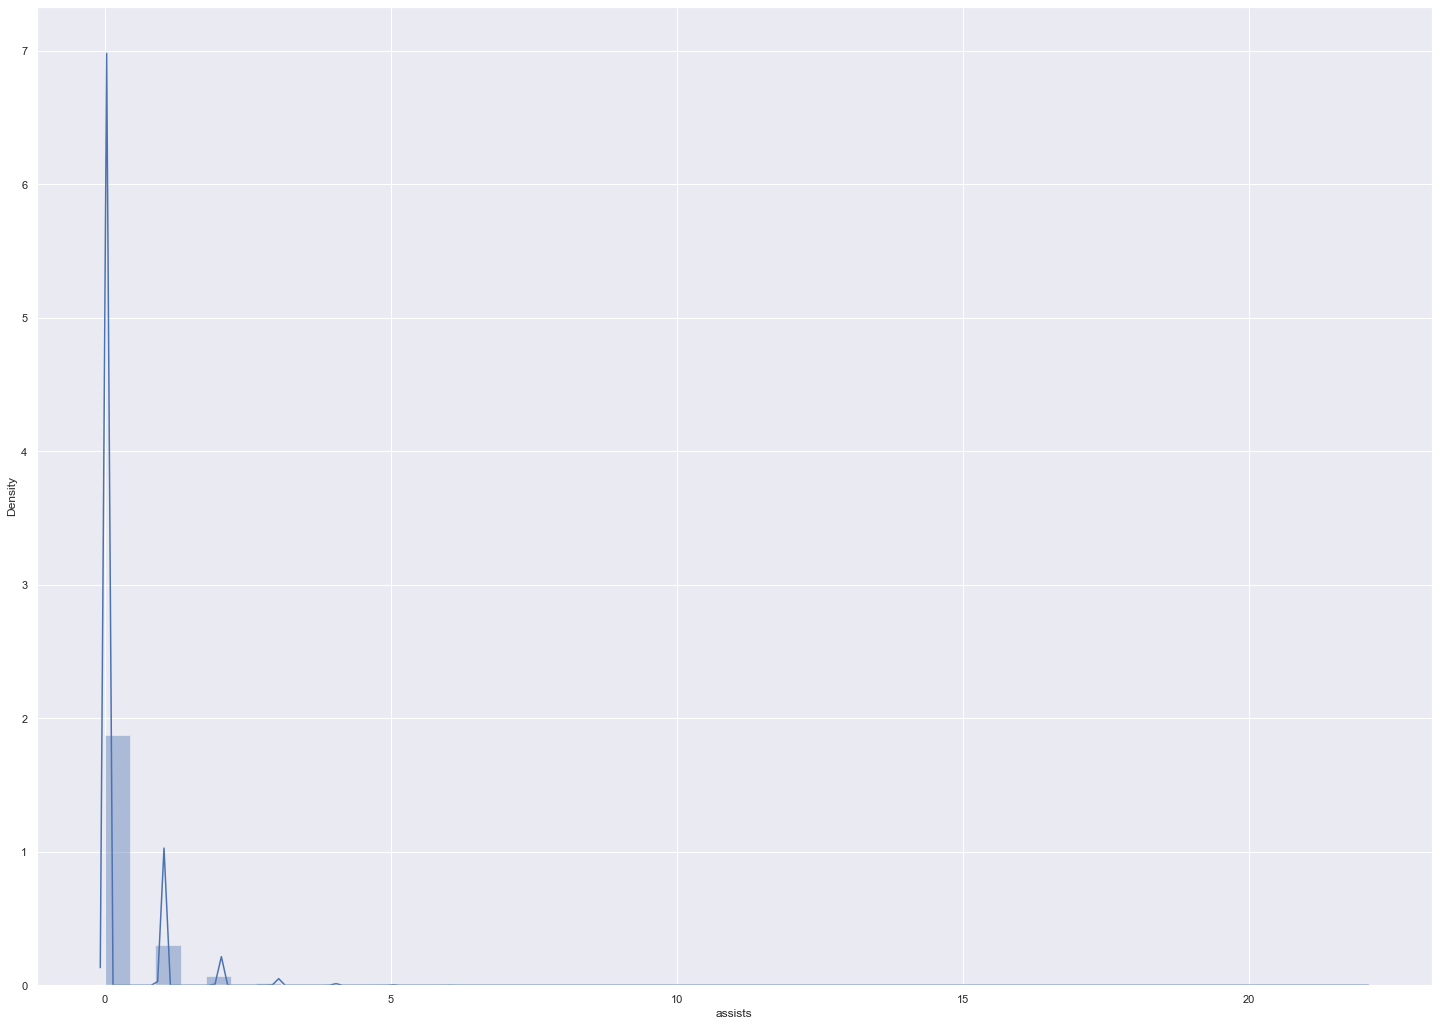

boosts
1.9445926191002416


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


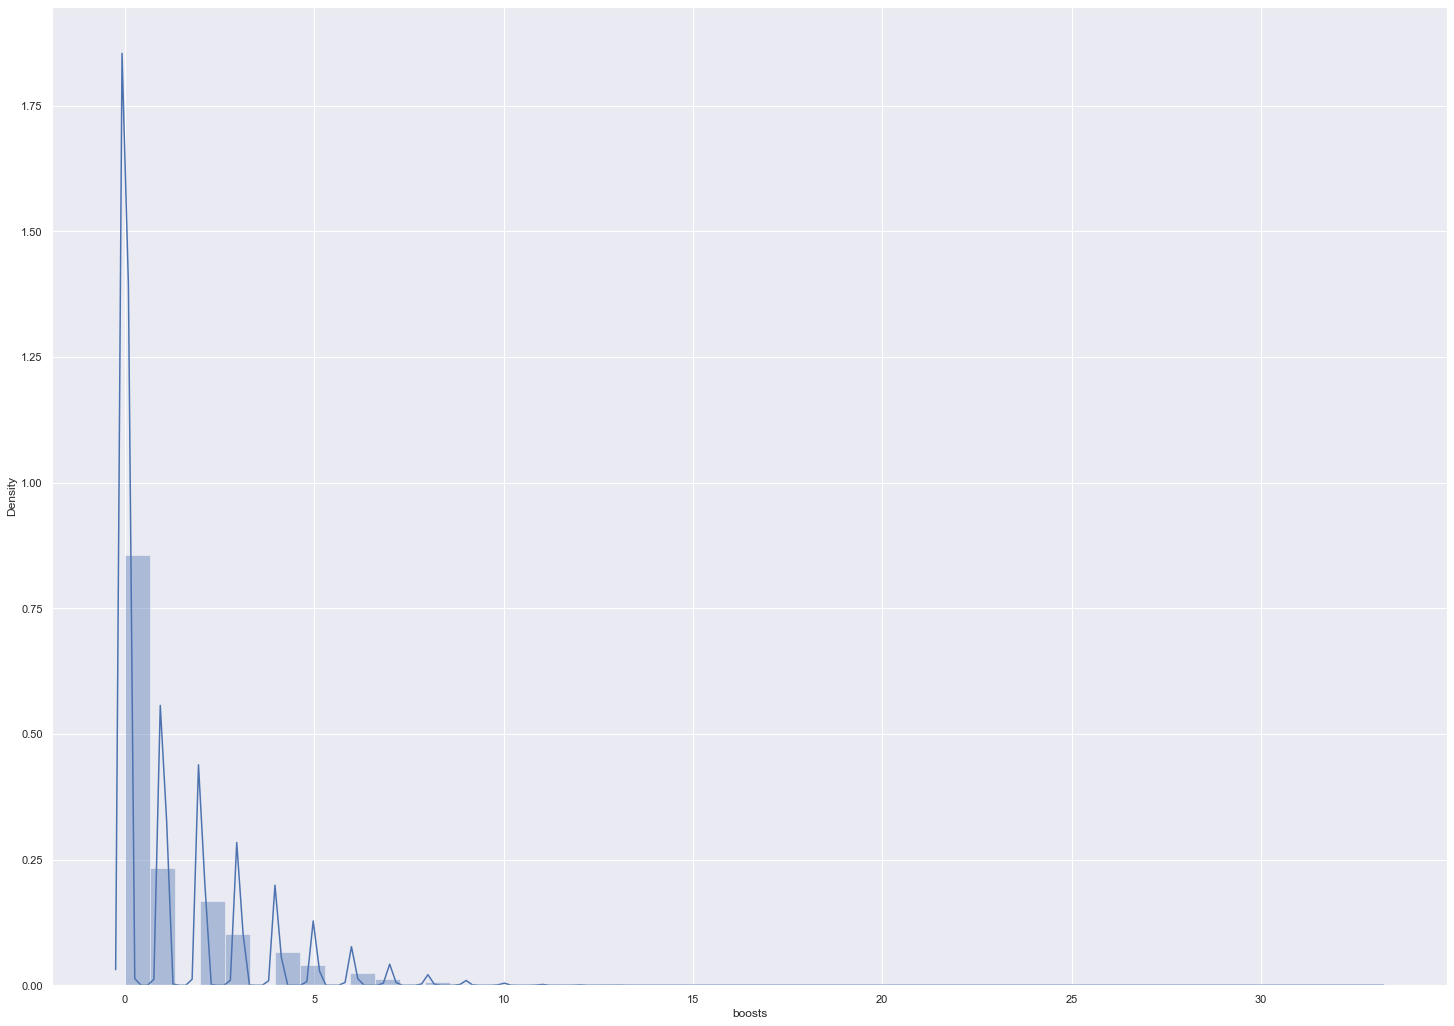

damageDealt
2.9561582


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


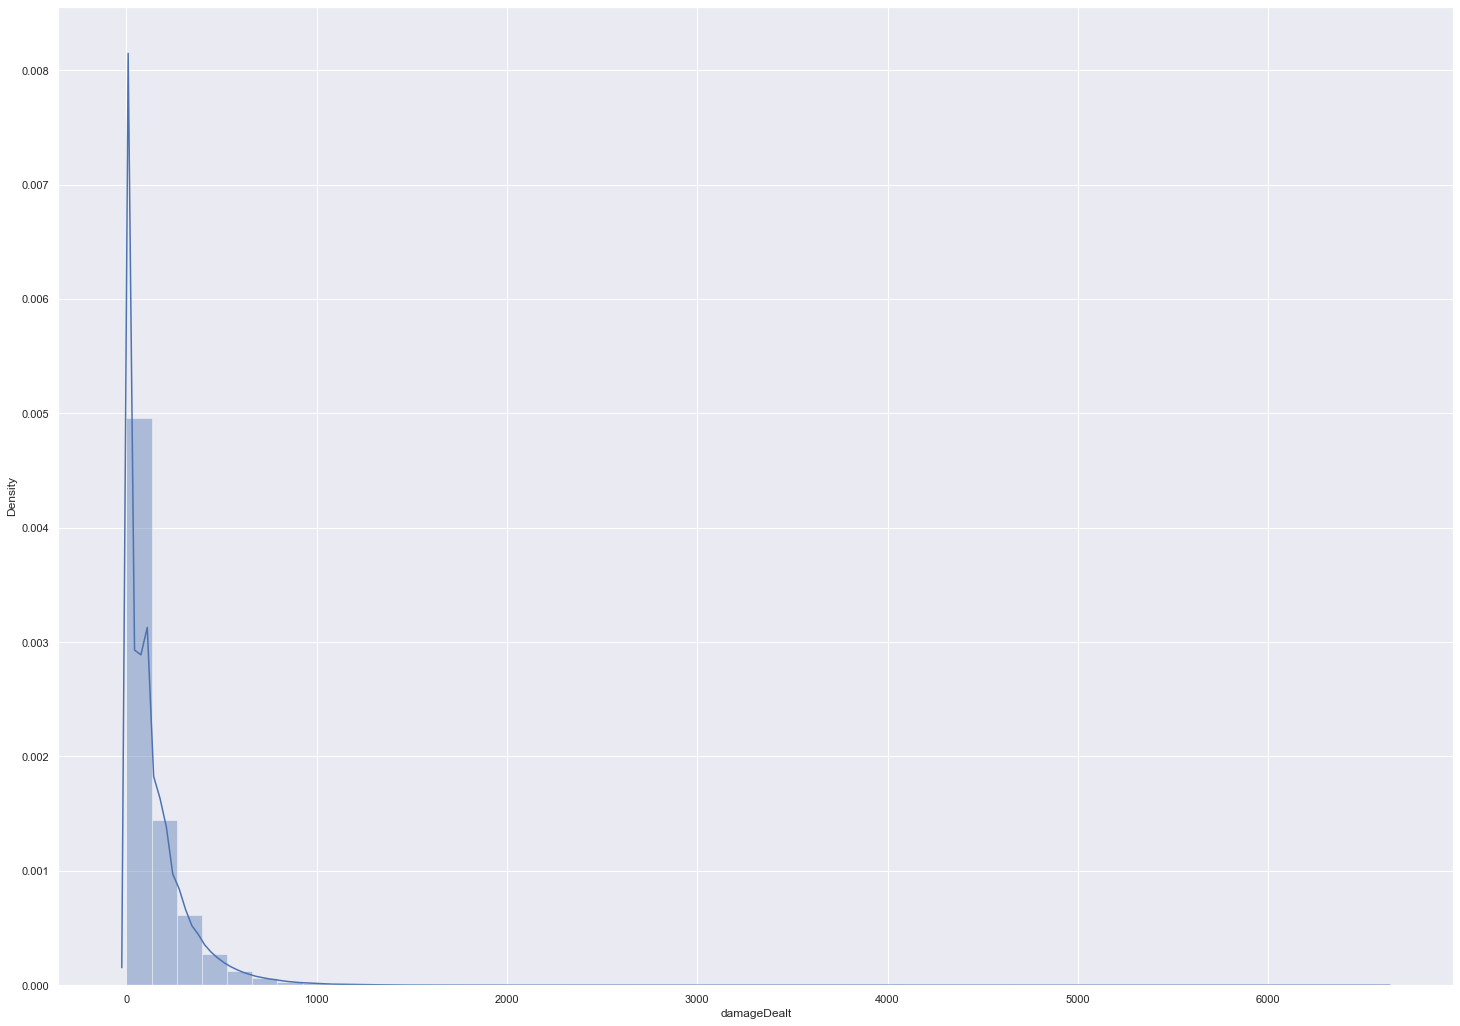

DBNOs
3.195699069600957


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


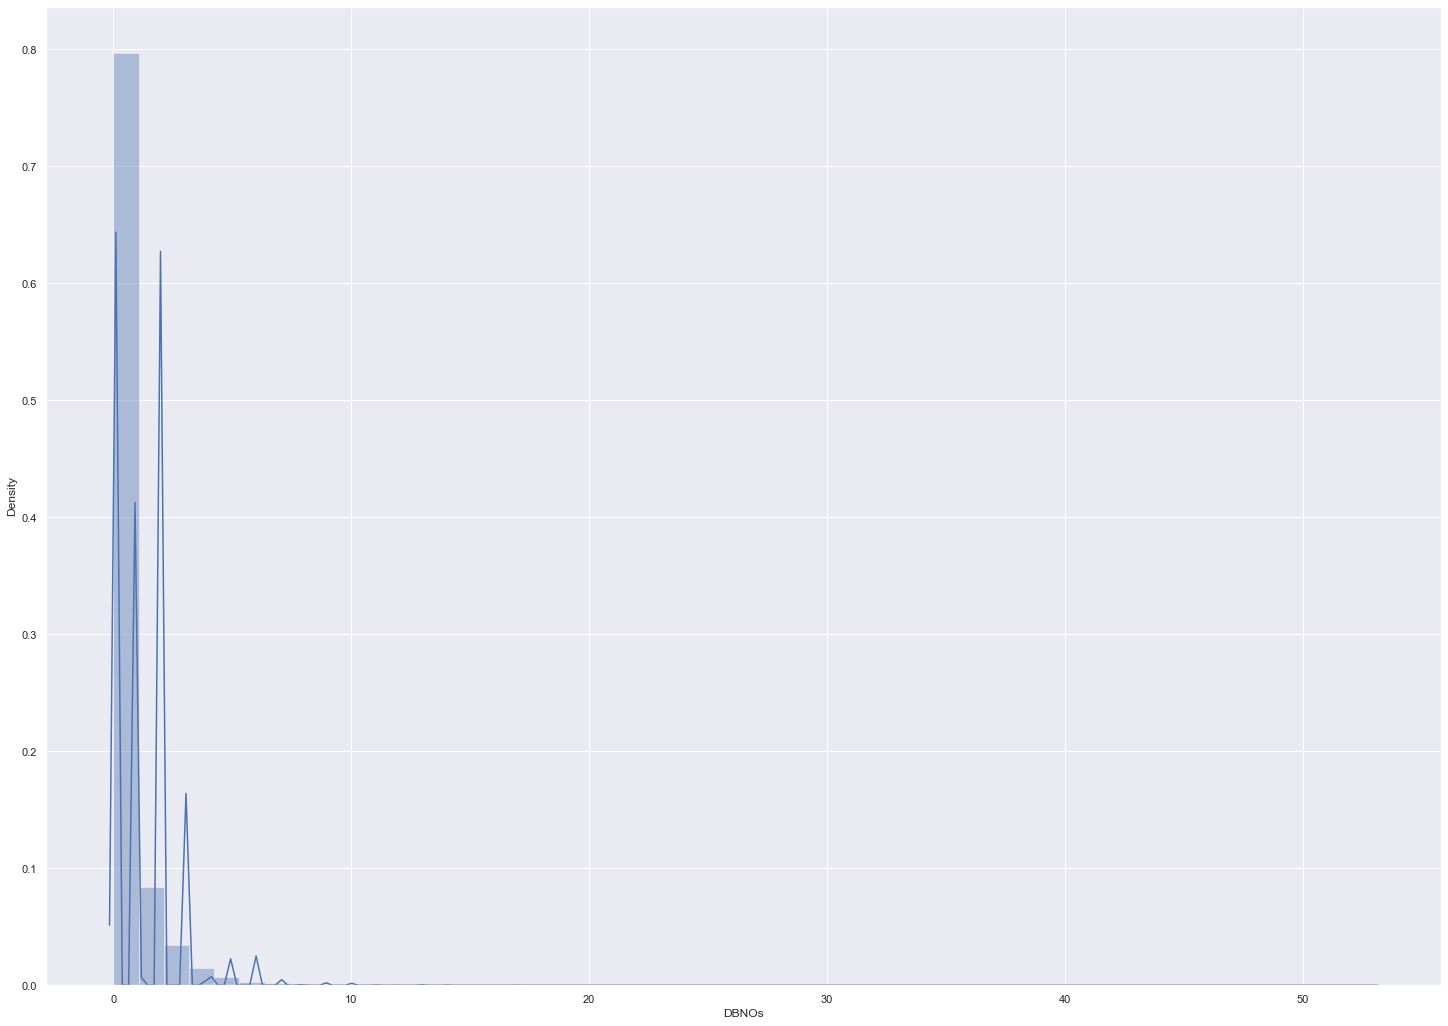

headshotKills
5.208561599578273


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


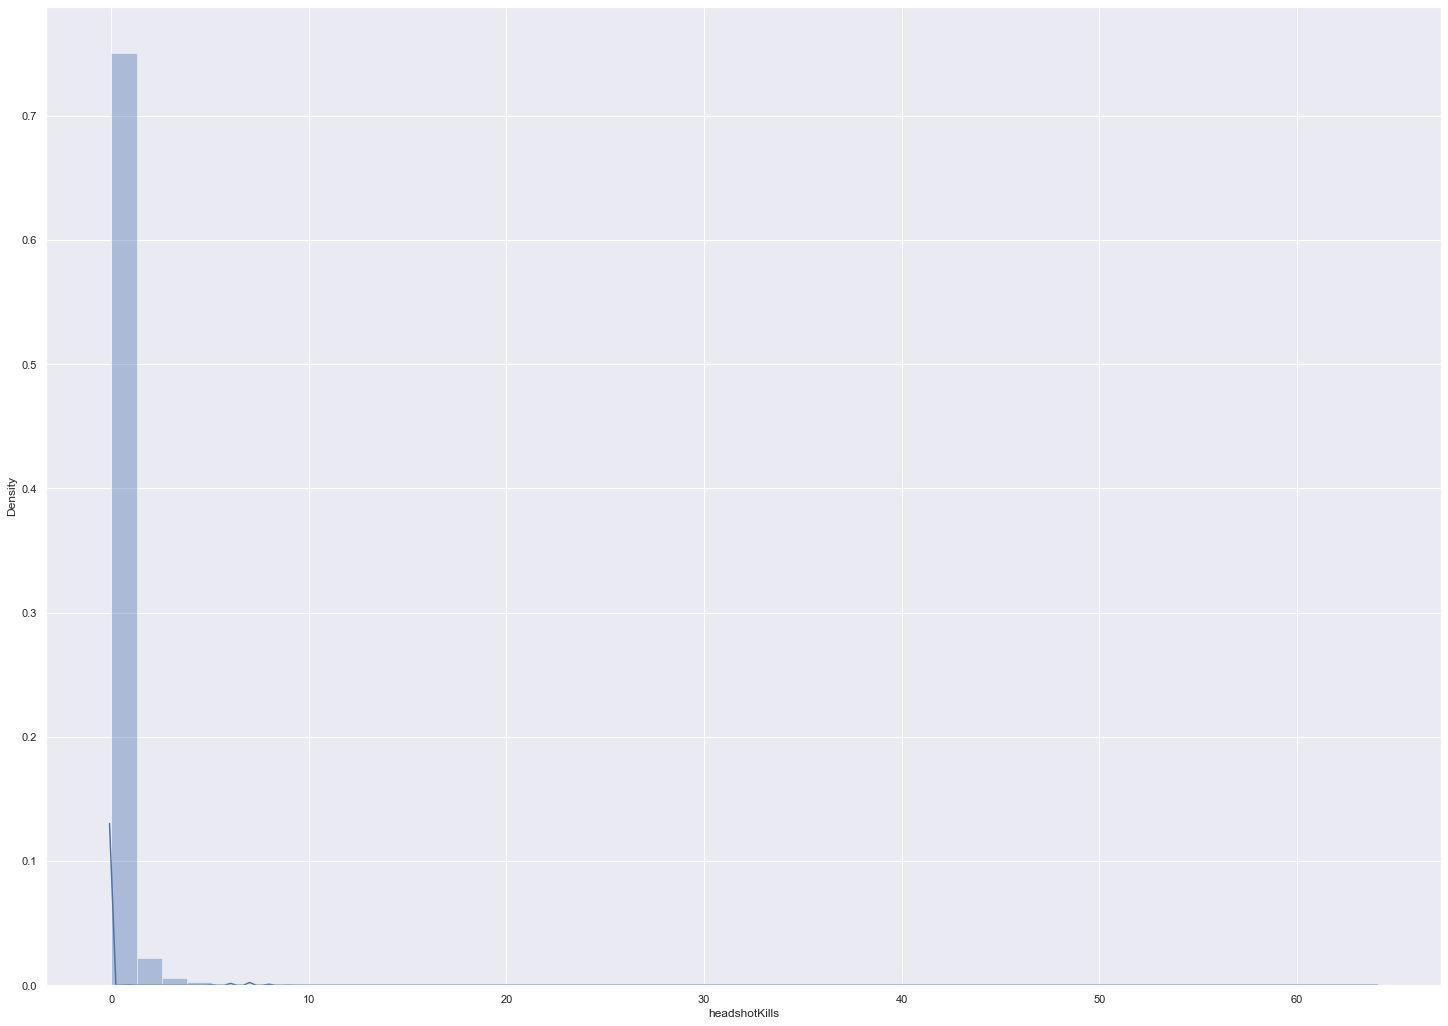

heals
3.4376723815977406


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


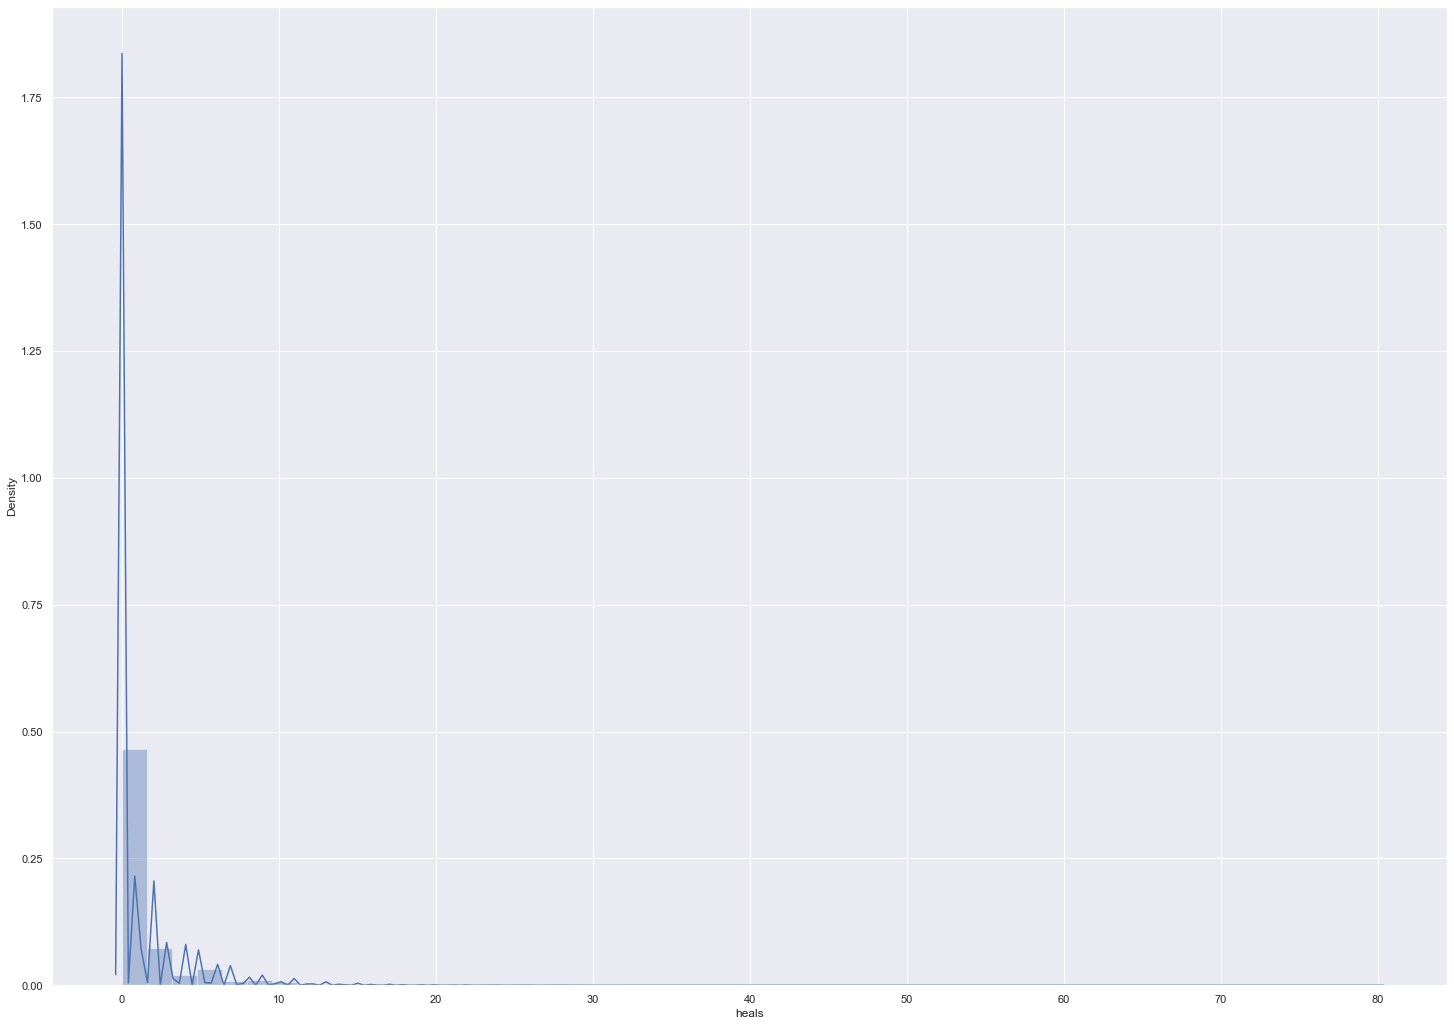

killPlace
0.028124622138845524


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


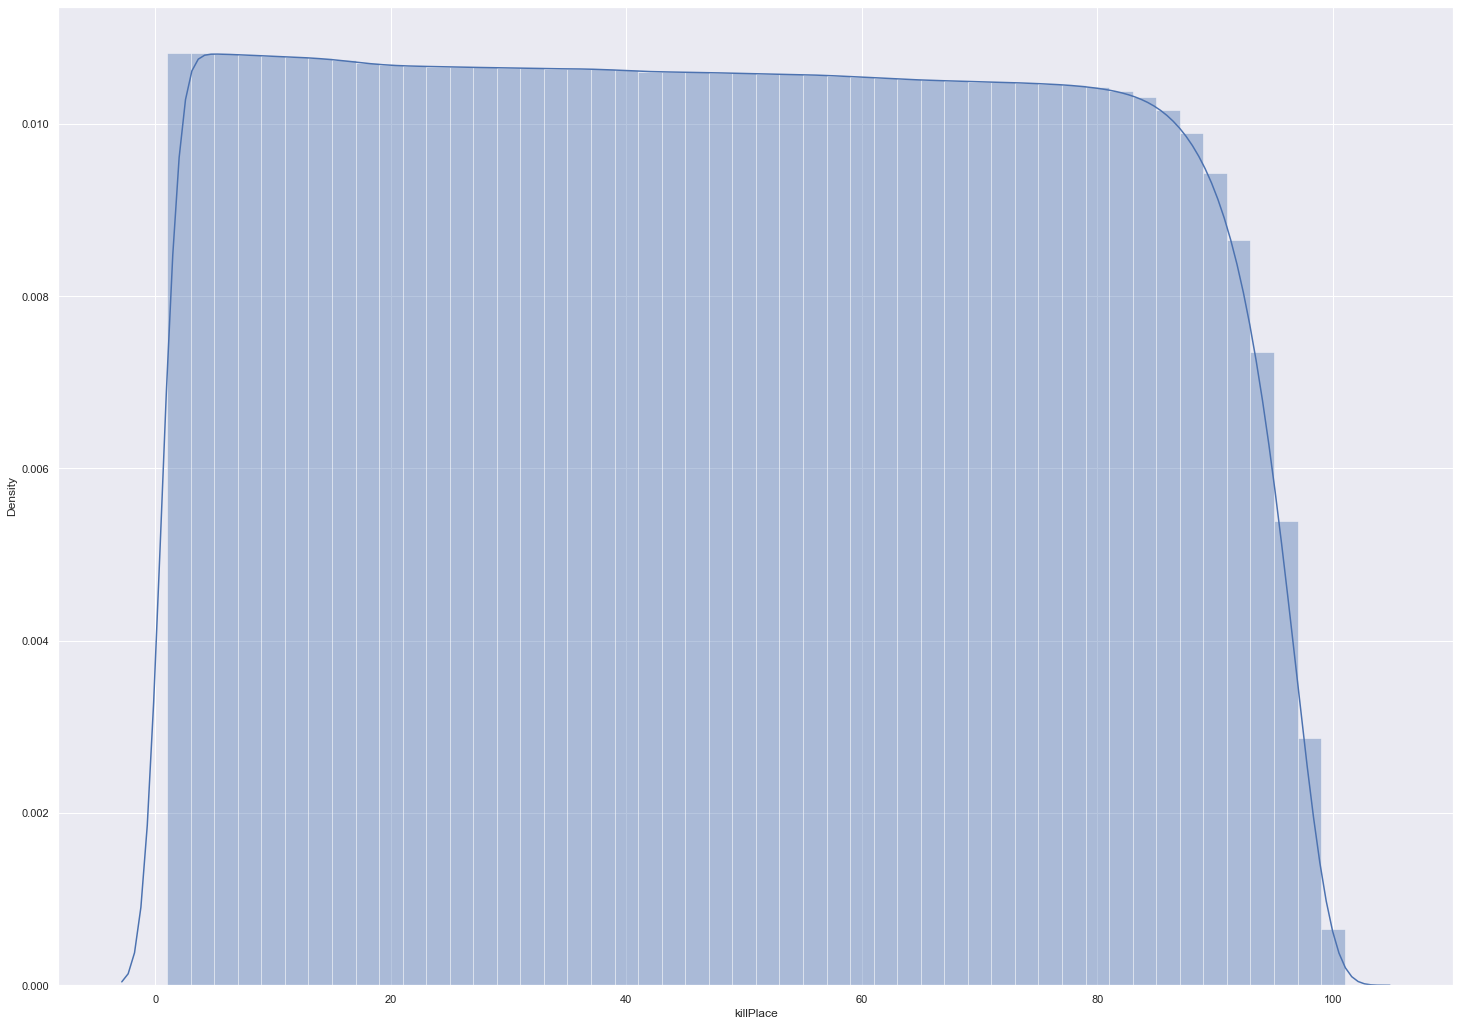

killPoints
0.5139629084024641


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


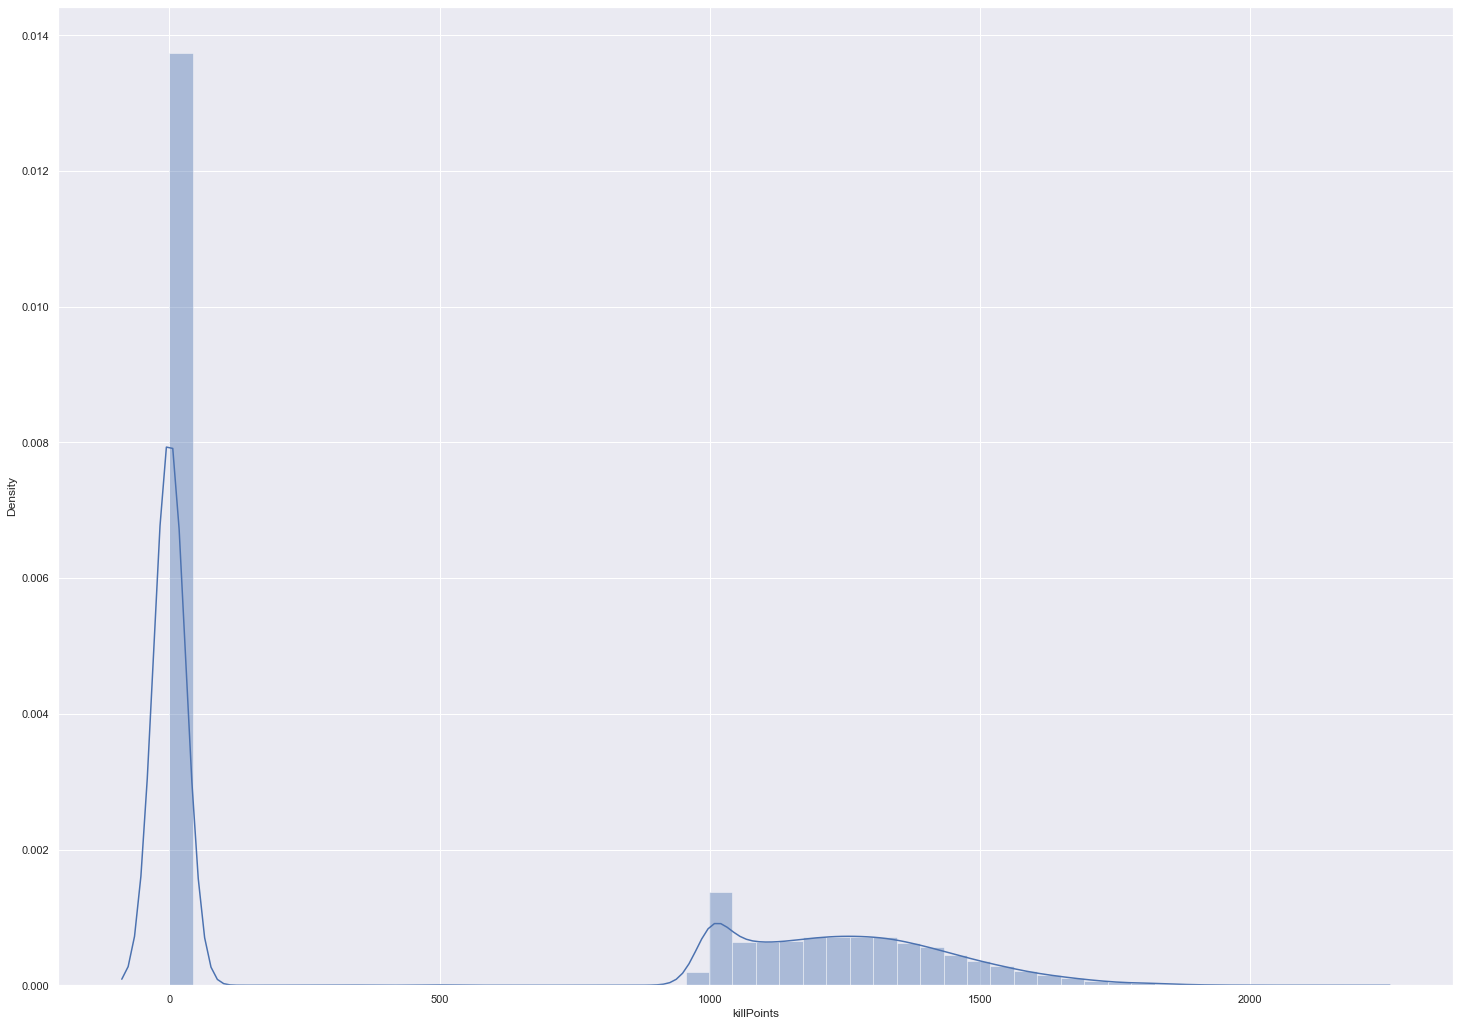

kills
3.357351064441899


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


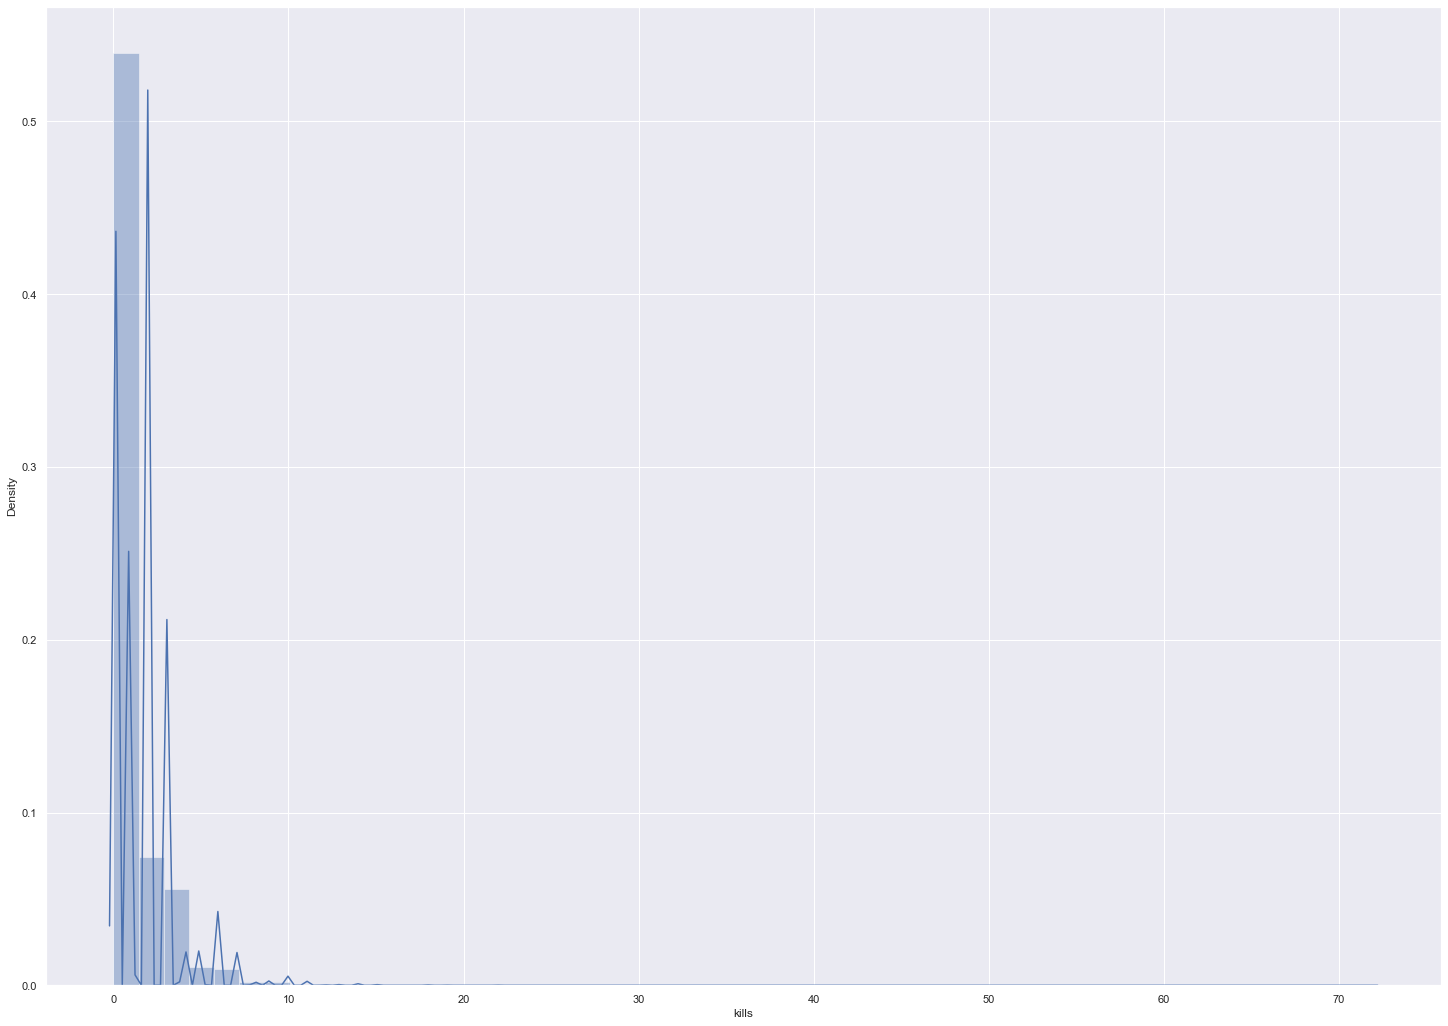

killStreaks
1.24739606043175


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyboardInterrupt: 

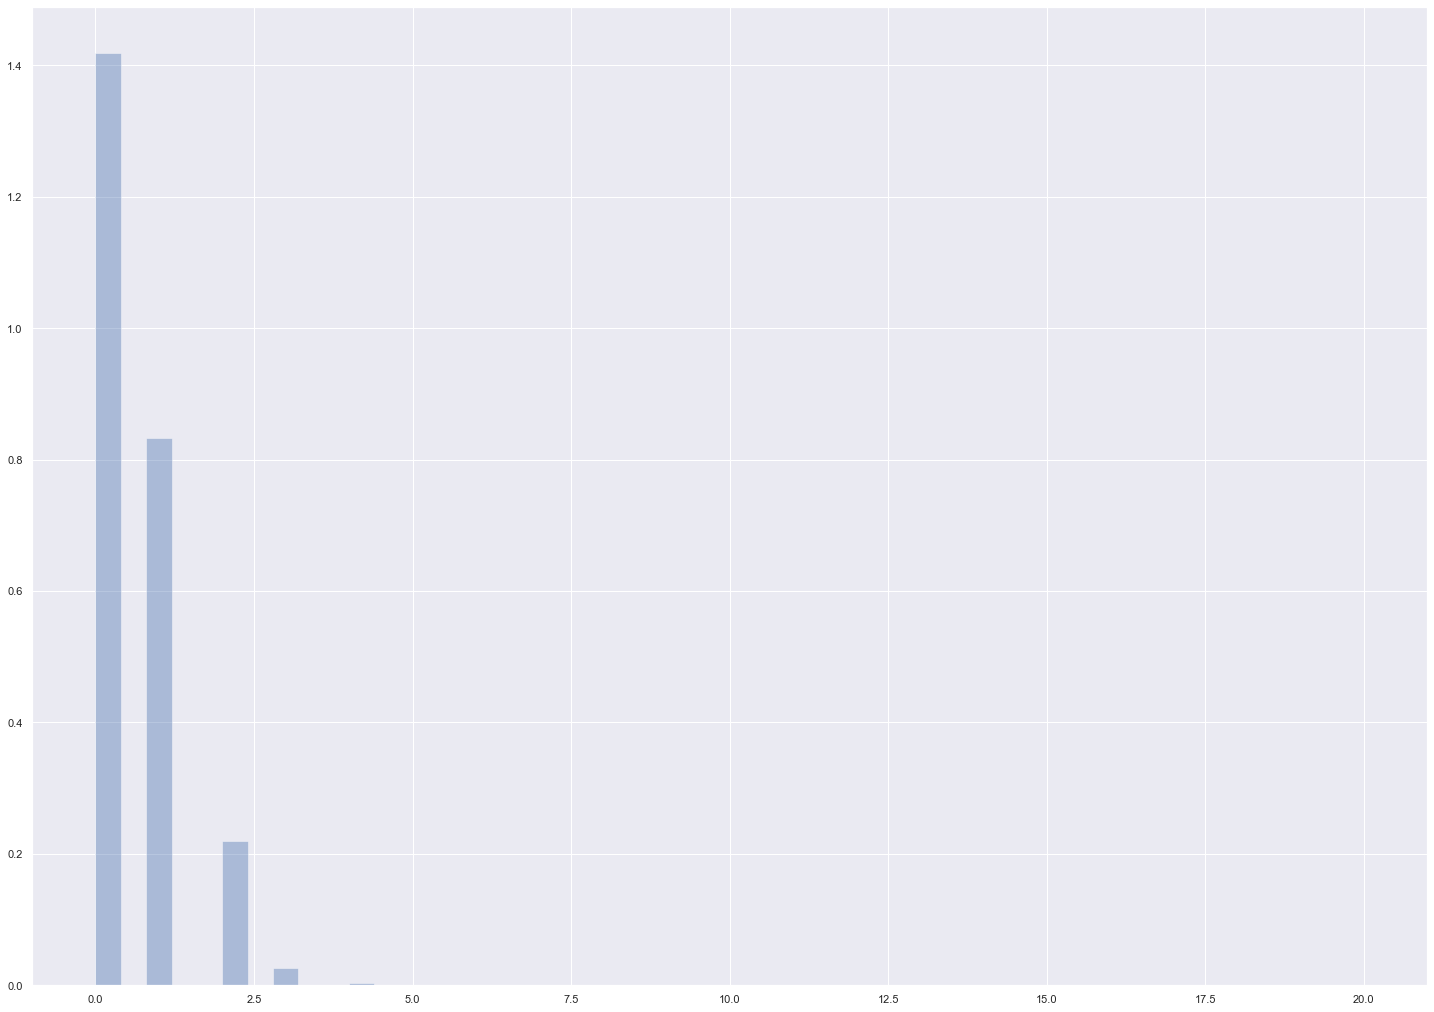

In [12]:
from scipy.stats import skew
xc = df.drop("matchType",axis=1)
for col in xc.columns :
    print (col)
    print (xc[col].skew())
    plt.figure ( )
    sns.distplot(xc[col])
    plt.show()

## Define function to handle skewnees prob with the continuous variable only

In [71]:
def sqrt(x):
    df[x]=np.sqrt(df[x])
    print (df[x].skew())
#     plt.figure ( )
#     sns.distplot(df[x])
#     plt.show()

    


In [72]:
sqrt("damageDealt")

0.5157704


In [83]:
#*2
sqrt*2("longestKill")

0.40910774


In [88]:
#*4
sqrt*4("rideDistance")

1.1205875


In [89]:
#*4
sqrt*4("swimDistance")

3.5282602


## making suer that i get rid of the outliers with the IQR method

In [144]:
def detect_outliers_iqr_max_min(df,col):
    percentile25 = df[col].quantile(0.25);
    percentile75 = df[col].quantile(0.75);

    upper_limit = percentile75 + 1.5 * (percentile75 - percentile25);
    lower_limit = percentile25 - 1.5 * (percentile75 - percentile25);
    
    print("Old Shape: ",df.shape)
    df = df.loc[(df[col] > lower_limit) & (df[col] < upper_limit)]
###    df.drop(df[ (df[col] > upper_limit) | (df[col] < lower_limit) ].index , inplace=True)
    print("New Shape: ",df.shape)
###    df = df.loc[(df.col == upper_limit),col] = upper_limit
###    df.loc[df[col] == upper_limit ] = upper_limit
###    df.loc[df[col] == lower_limit ] = lower_limit
    sns.boxplot(x = df[col]);
    plt.show()
    return df


Old Shape:  (4358705, 26)
New Shape:  (3842062, 26)


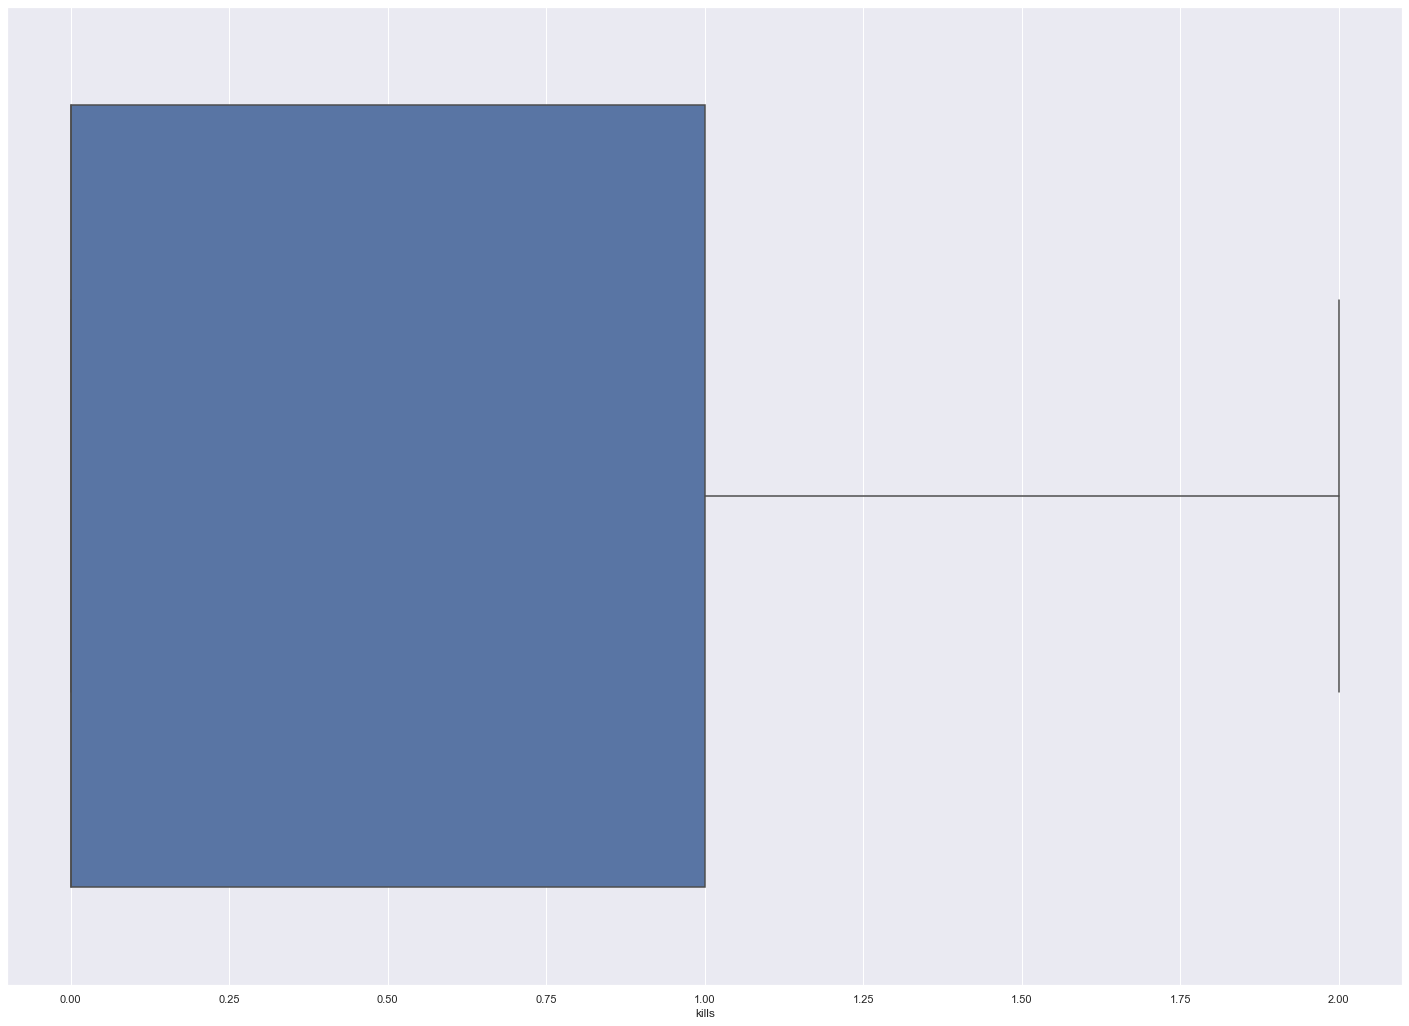

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,headshot_rate
0,0,0,0.000,0,0,0,60,1241,0,0,...,0,0.000,0,0,244.800,1,1466,0.444,244.800,0.000
1,0,0,9.564,0,0,0,57,0,0,0,...,0,1.019,0,0,1434.000,5,0,0.640,1435.978,0.000
2,1,0,8.246,0,0,0,47,0,0,0,...,0,0.000,0,0,161.800,2,0,0.775,161.800,0.000
3,0,0,5.736,0,0,0,75,0,0,0,...,0,0.000,0,0,202.700,3,0,0.167,202.700,0.000
4,0,0,10.000,0,0,0,45,0,1,1,...,0,0.000,0,0,49.750,2,0,0.188,49.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000,0,0,0,74,1029,0,0,...,0,0.000,0,0,1019.000,3,1507,0.179,1020.058,0.000
4446962,0,1,6.645,0,0,0,69,0,0,0,...,0,0.000,0,0,81.700,6,0,0.294,81.700,0.000
4446963,0,0,7.685,0,0,0,66,0,0,0,...,0,1.006,0,0,788.700,4,0,0.481,789.706,0.000
4446964,0,4,13.431,1,1,2,11,0,2,1,...,0,0.000,0,0,2748.000,8,0,0.800,2748.000,0.500


In [145]:
detect_outliers_iqr_max_min(df,"kills")

Old Shape:  (4446965, 24)
New Shape:  (4184503, 24)


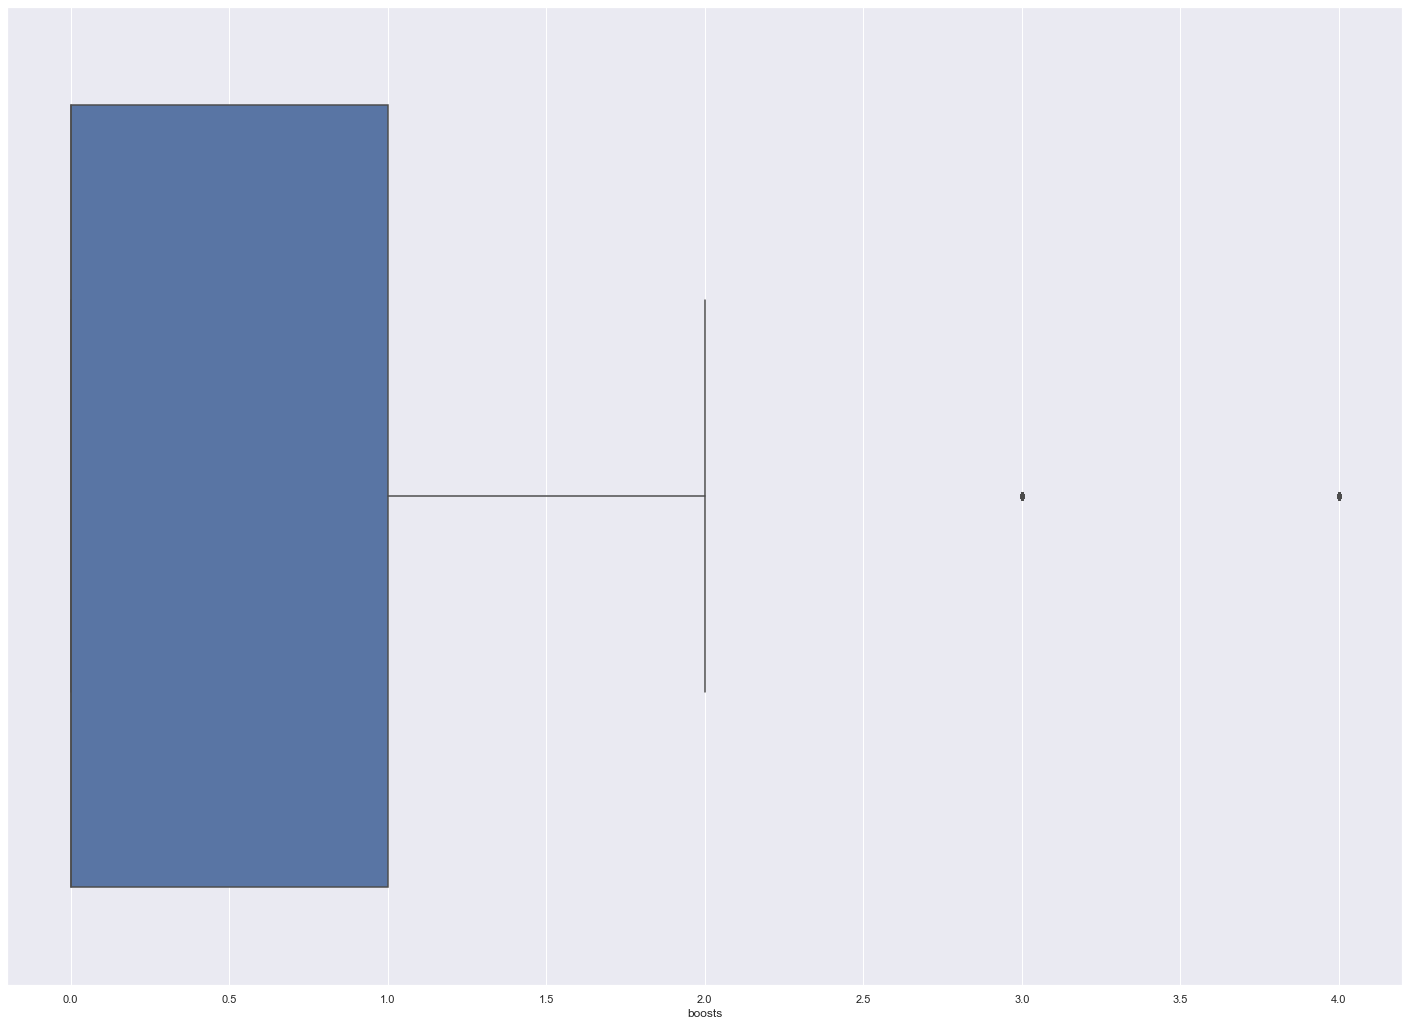

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000,0,0,0,60,1241,0,0,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,0,0,9.564,0,0,0,57,0,0,0,...,0,0.959,0,1.019,0,0,1434.000,5,0,0.640
2,1,0,8.246,0,0,0,47,0,0,0,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,0,0,5.736,0,0,0,75,0,0,0,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,0,0,10.000,0,0,0,45,0,1,1,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000,0,0,0,74,1029,0,0,...,0,1.058,0,0.000,0,0,1019.000,3,1507,0.179
4446962,0,1,6.645,0,0,0,69,0,0,0,...,0,0.000,0,0.000,0,0,81.700,6,0,0.294
4446963,0,0,7.685,0,0,0,66,0,0,0,...,0,0.000,0,1.006,0,0,788.700,4,0,0.481
4446964,0,4,13.431,1,1,2,11,0,2,1,...,2,0.000,0,0.000,0,0,2748.000,8,0,0.800


In [102]:
detect_outliers_iqr_max_min(df,"boosts")

Old Shape:  (4446965, 24)
New Shape:  (4152134, 24)


C:\Users\noora\AppData\Local\Temp\ipykernel_4928\3539086393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] == upper_limit ] = upper_limit


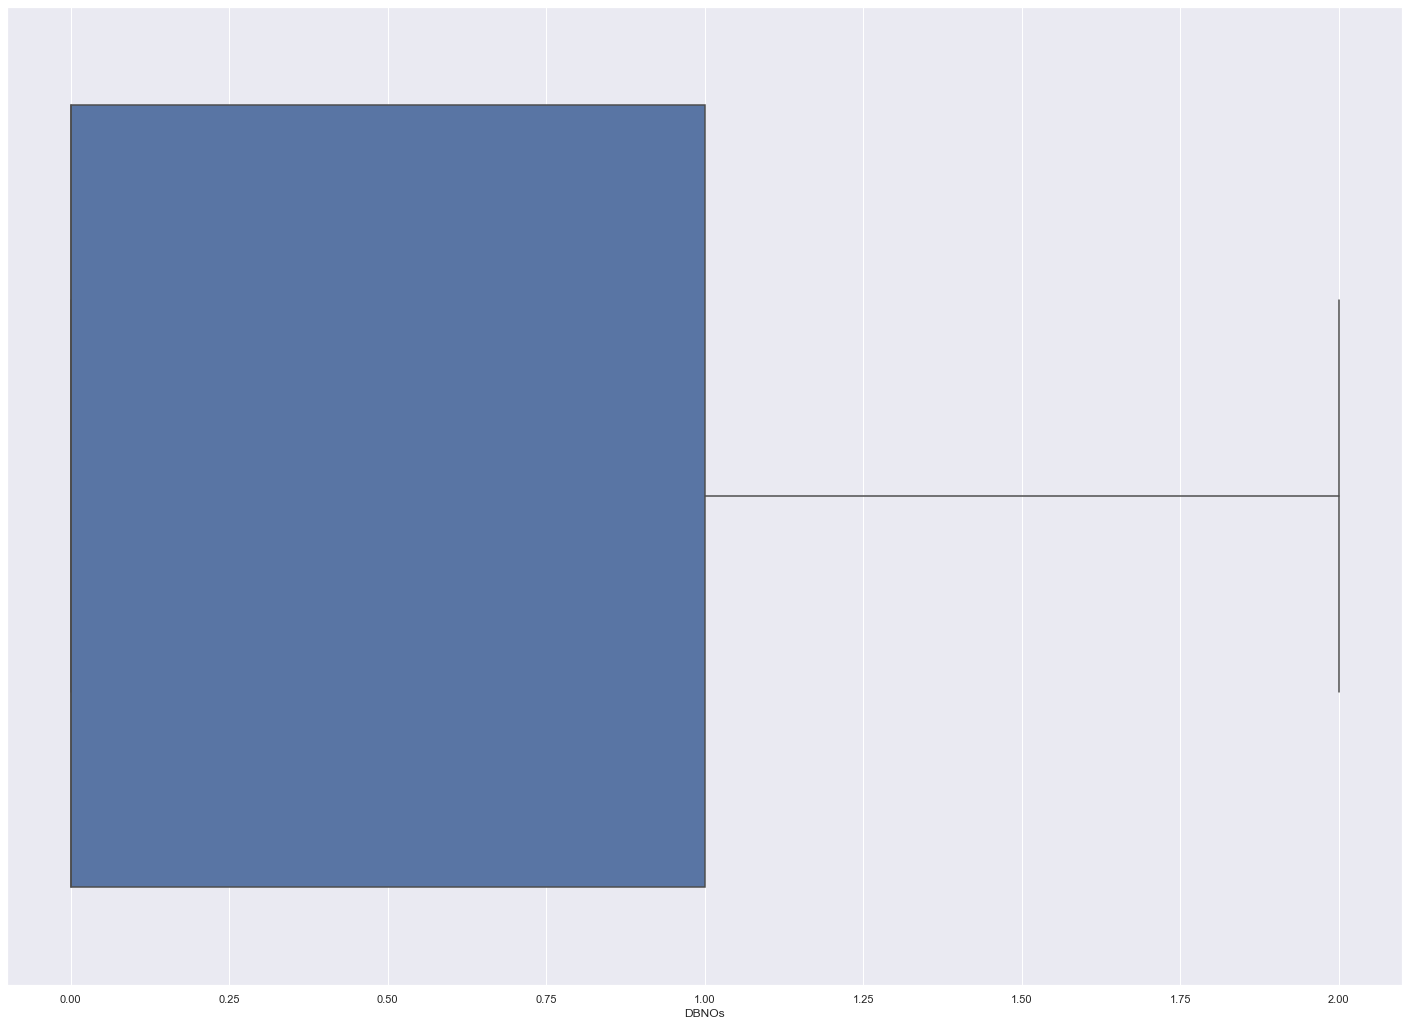

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000,0.000,0.000,0.000,0.000,0.000,60.000,1241.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,244.800,1.000,1466.000,0.444
1,0.000,0.000,9.564,0.000,0.000,0.000,57.000,0.000,0.000,0.000,...,0.000,0.959,0.000,1.019,0.000,0.000,1434.000,5.000,0.000,0.640
2,1.000,0.000,8.246,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,161.800,2.000,0.000,0.775
3,0.000,0.000,5.736,0.000,0.000,0.000,75.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,202.700,3.000,0.000,0.167
4,0.000,0.000,10.000,0.000,0.000,0.000,45.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,49.750,2.000,0.000,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.000,0.000,0.000,0.000,0.000,0.000,74.000,1029.000,0.000,0.000,...,0.000,1.058,0.000,0.000,0.000,0.000,1019.000,3.000,1507.000,0.179
4446962,0.000,1.000,6.645,0.000,0.000,0.000,69.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,81.700,6.000,0.000,0.294
4446963,0.000,0.000,7.685,0.000,0.000,0.000,66.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.006,0.000,0.000,788.700,4.000,0.000,0.481
4446964,0.000,4.000,13.431,1.000,1.000,2.000,11.000,0.000,2.000,1.000,...,2.000,0.000,0.000,0.000,0.000,0.000,2748.000,8.000,0.000,0.800


In [103]:
detect_outliers_iqr_max_min(df,"DBNOs")

Old Shape:  (4446965, 24)
New Shape:  (3985668, 24)


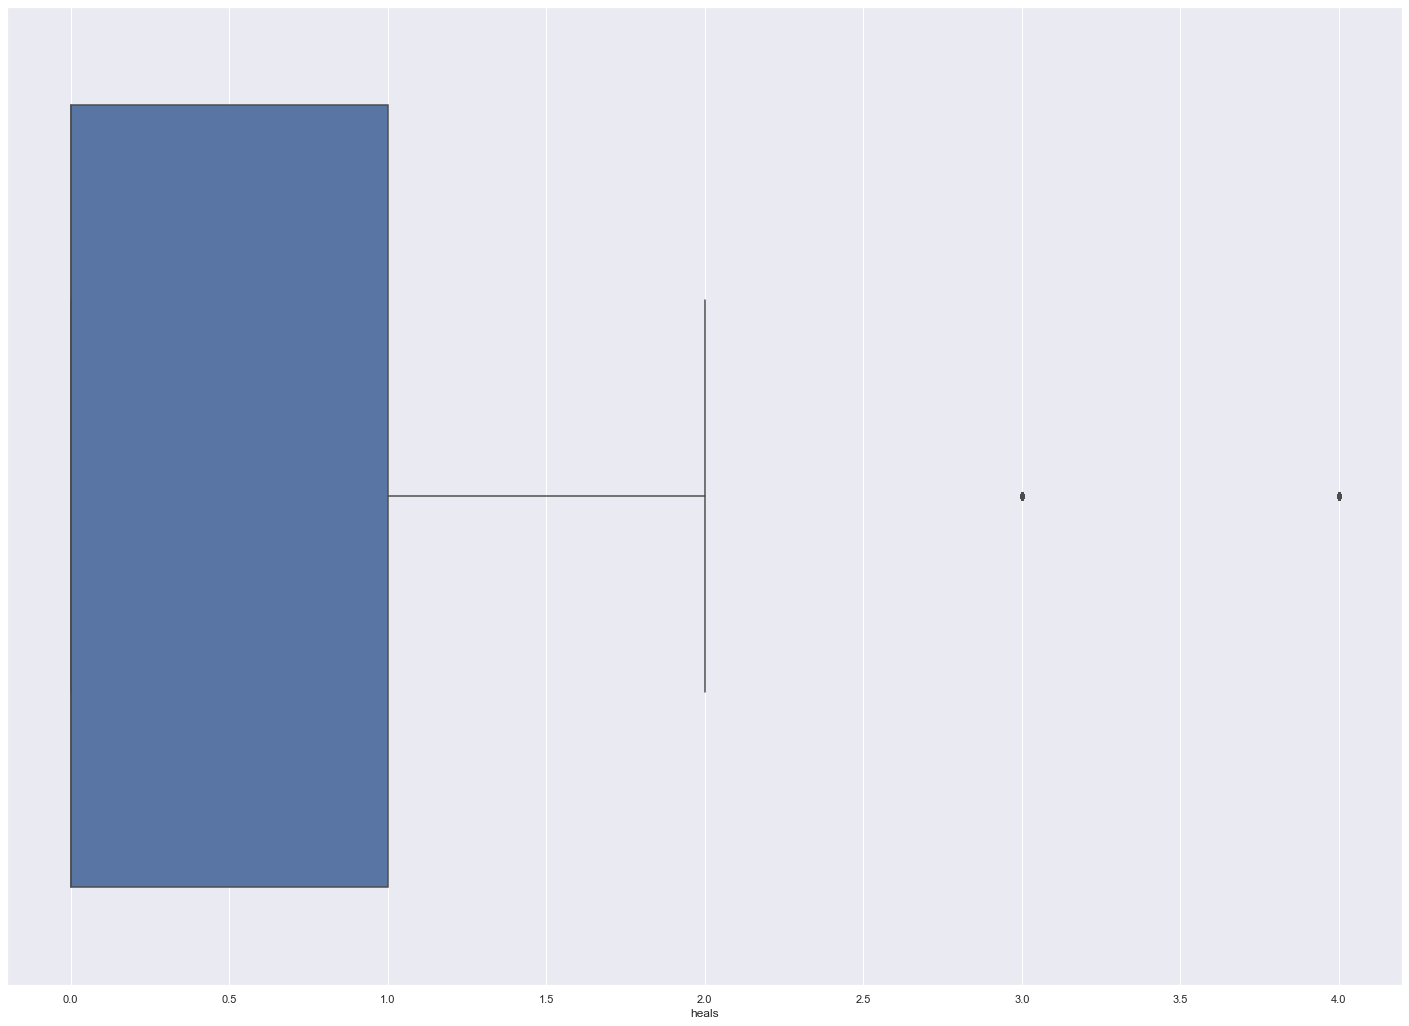

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000,0,0,0,60,1241,0,0,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,0,0,9.564,0,0,0,57,0,0,0,...,0,0.959,0,1.019,0,0,1434.000,5,0,0.640
2,1,0,8.246,0,0,0,47,0,0,0,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,0,0,5.736,0,0,0,75,0,0,0,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,0,0,10.000,0,0,0,45,0,1,1,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000,0,0,0,74,1029,0,0,...,0,1.058,0,0.000,0,0,1019.000,3,1507,0.179
4446962,0,1,6.645,0,0,0,69,0,0,0,...,0,0.000,0,0.000,0,0,81.700,6,0,0.294
4446963,0,0,7.685,0,0,0,66,0,0,0,...,0,0.000,0,1.006,0,0,788.700,4,0,0.481
4446964,0,4,13.431,1,1,2,11,0,2,1,...,2,0.000,0,0.000,0,0,2748.000,8,0,0.800


In [104]:
detect_outliers_iqr_max_min(df,"heals")

Old Shape:  (4446965, 24)
New Shape:  (4446965, 24)


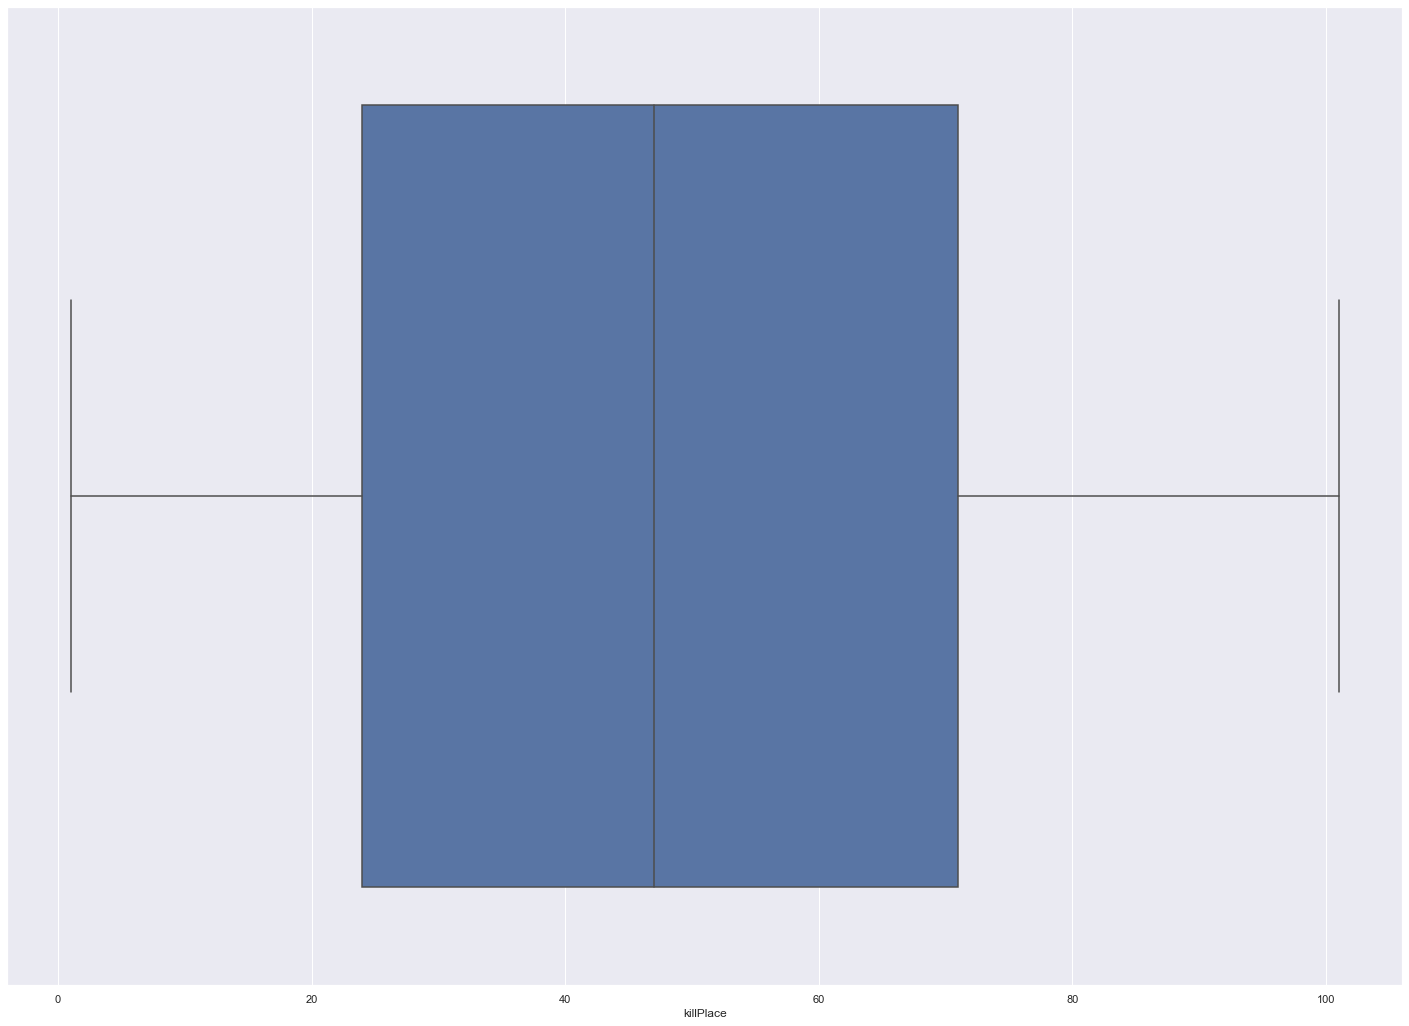

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000,0.000,0.000,0.000,0.000,0.000,60.000,1241.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,244.800,1.000,1466.000,0.444
1,0.000,0.000,9.564,0.000,0.000,0.000,57.000,0.000,0.000,0.000,...,0.000,0.959,0.000,1.019,0.000,0.000,1434.000,5.000,0.000,0.640
2,1.000,0.000,8.246,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,161.800,2.000,0.000,0.775
3,0.000,0.000,5.736,0.000,0.000,0.000,75.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,202.700,3.000,0.000,0.167
4,0.000,0.000,10.000,0.000,0.000,0.000,45.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,49.750,2.000,0.000,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.000,0.000,0.000,0.000,0.000,0.000,74.000,1029.000,0.000,0.000,...,0.000,1.058,0.000,0.000,0.000,0.000,1019.000,3.000,1507.000,0.179
4446962,0.000,1.000,6.645,0.000,0.000,0.000,69.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,81.700,6.000,0.000,0.294
4446963,0.000,0.000,7.685,0.000,0.000,0.000,66.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.006,0.000,0.000,788.700,4.000,0.000,0.481
4446964,0.000,4.000,13.431,1.000,1.000,2.000,11.000,0.000,2.000,1.000,...,2.000,0.000,0.000,0.000,0.000,0.000,2748.000,8.000,0.000,0.800


In [105]:
detect_outliers_iqr_max_min(df,"killPlace")

Old Shape:  (4446965, 24)
New Shape:  (4446965, 24)


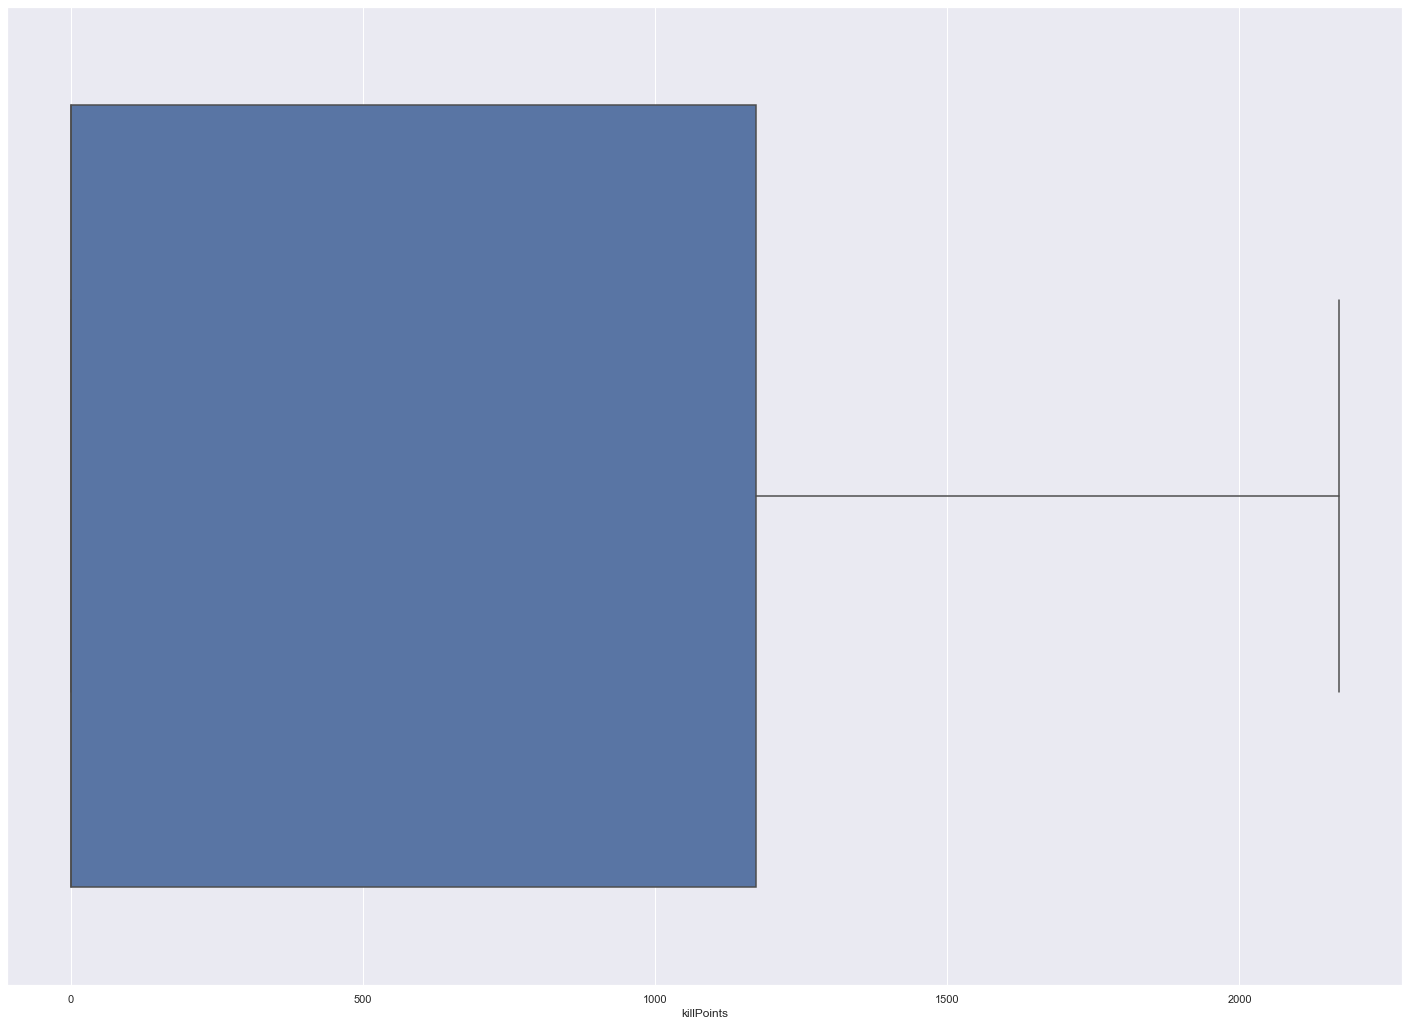

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000,0,0,0,60,1241,0,0,...,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,0,0,9.564,0,0,0,57,0,0,0,...,0,0.959,0,1.019,0,0,1434.000,5,0,0.640
2,1,0,8.246,0,0,0,47,0,0,0,...,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,0,0,5.736,0,0,0,75,0,0,0,...,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,0,0,10.000,0,0,0,45,0,1,1,...,0,0.000,0,0.000,0,0,49.750,2,0,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000,0,0,0,74,1029,0,0,...,0,1.058,0,0.000,0,0,1019.000,3,1507,0.179
4446962,0,1,6.645,0,0,0,69,0,0,0,...,0,0.000,0,0.000,0,0,81.700,6,0,0.294
4446963,0,0,7.685,0,0,0,66,0,0,0,...,0,0.000,0,1.006,0,0,788.700,4,0,0.481
4446964,0,4,13.431,1,1,2,11,0,2,1,...,2,0.000,0,0.000,0,0,2748.000,8,0,0.800


In [106]:
detect_outliers_iqr_max_min(df,"killPoints")

Old Shape:  (4446965, 24)
New Shape:  (4394625, 24)


C:\Users\noora\AppData\Local\Temp\ipykernel_4928\3539086393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] == upper_limit ] = upper_limit


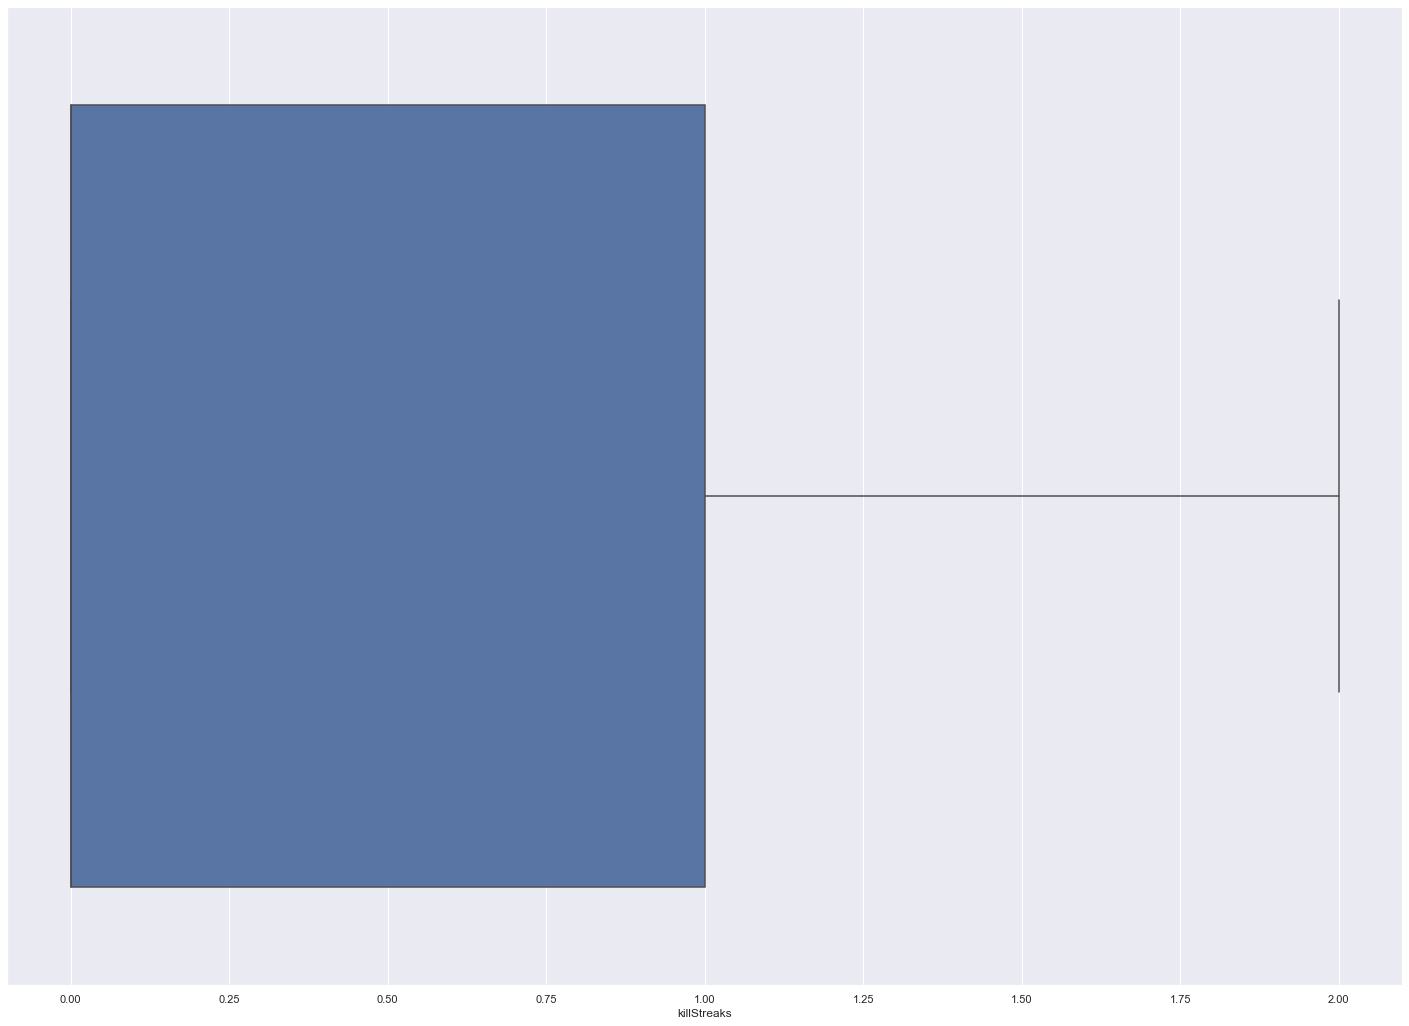

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000,0.000,0.000,0.000,0.000,0.000,60.000,1241.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,244.800,1.000,1466.000,0.444
1,0.000,0.000,9.564,0.000,0.000,0.000,57.000,0.000,0.000,0.000,...,0.000,0.959,0.000,1.019,0.000,0.000,1434.000,5.000,0.000,0.640
2,1.000,0.000,8.246,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,161.800,2.000,0.000,0.775
3,0.000,0.000,5.736,0.000,0.000,0.000,75.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,202.700,3.000,0.000,0.167
4,0.000,0.000,10.000,0.000,0.000,0.000,45.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,49.750,2.000,0.000,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.000,0.000,0.000,0.000,0.000,0.000,74.000,1029.000,0.000,0.000,...,0.000,1.058,0.000,0.000,0.000,0.000,1019.000,3.000,1507.000,0.179
4446962,0.000,1.000,6.645,0.000,0.000,0.000,69.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,81.700,6.000,0.000,0.294
4446963,0.000,0.000,7.685,0.000,0.000,0.000,66.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.006,0.000,0.000,788.700,4.000,0.000,0.481
4446964,0.000,4.000,13.431,1.000,1.000,2.000,11.000,0.000,2.000,1.000,...,2.000,0.000,0.000,0.000,0.000,0.000,2748.000,8.000,0.000,0.800


In [108]:
detect_outliers_iqr_max_min(df,"killStreaks")

Old Shape:  (4446965, 24)
New Shape:  (3745104, 24)


C:\Users\noora\AppData\Local\Temp\ipykernel_4928\3539086393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] == upper_limit ] = upper_limit


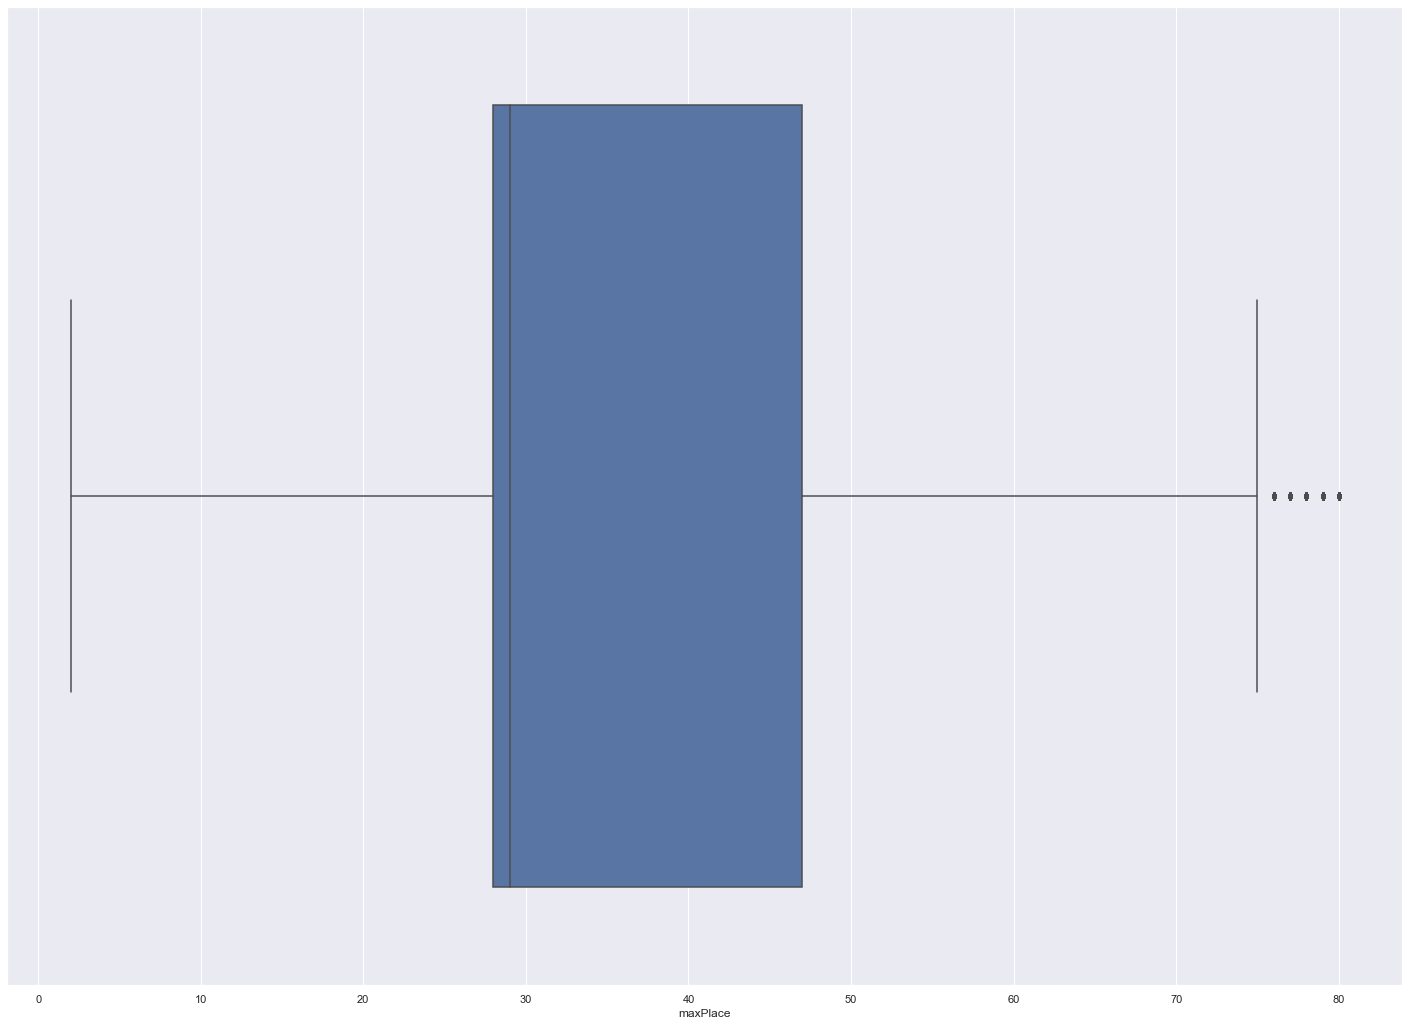

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000,0.000,0.000,0.000,0.000,0.000,60.000,1241.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,244.800,1.000,1466.000,0.444
1,0.000,0.000,9.564,0.000,0.000,0.000,57.000,0.000,0.000,0.000,...,0.000,0.959,0.000,1.019,0.000,0.000,1434.000,5.000,0.000,0.640
2,1.000,0.000,8.246,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,161.800,2.000,0.000,0.775
3,0.000,0.000,5.736,0.000,0.000,0.000,75.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,202.700,3.000,0.000,0.167
5,0.000,0.000,10.000,1.000,1.000,0.000,44.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,34.700,1.000,0.000,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446958,0.000,0.000,0.000,0.000,0.000,0.000,92.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4446960,0.000,0.000,18.102,3.000,2.000,0.000,4.000,0.000,4.000,3.000,...,0.000,1.041,0.000,0.000,0.000,0.000,845.600,3.000,0.000,0.241
4446961,0.000,0.000,0.000,0.000,0.000,0.000,74.000,1029.000,0.000,0.000,...,0.000,1.058,0.000,0.000,0.000,0.000,1019.000,3.000,1507.000,0.179
4446963,0.000,0.000,7.685,0.000,0.000,0.000,66.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.006,0.000,0.000,788.700,4.000,0.000,0.481


In [109]:
detect_outliers_iqr_max_min(df,"maxPlace")

Old Shape:  (4446965, 24)
New Shape:  (4446903, 24)


C:\Users\noora\AppData\Local\Temp\ipykernel_4928\3539086393.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[col] == upper_limit ] = upper_limit


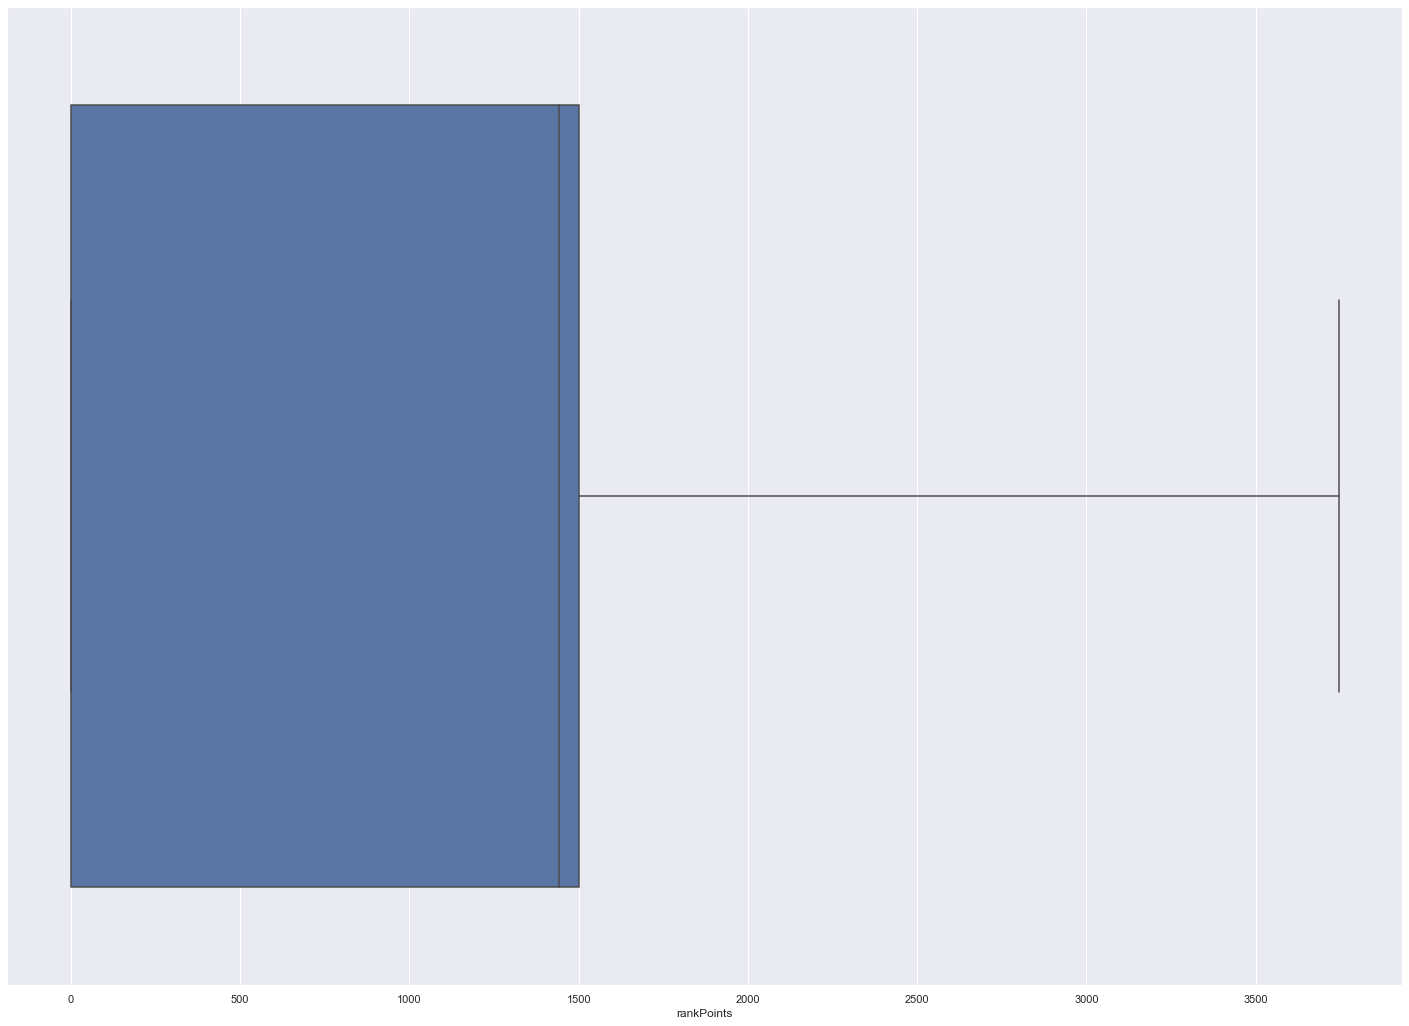

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000,0.000,0.000,0.000,0.000,0.000,60.000,1241.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,244.800,1.000,1466.000,0.444
1,0.000,0.000,9.564,0.000,0.000,0.000,57.000,0.000,0.000,0.000,...,0.000,0.959,0.000,1.019,0.000,0.000,1434.000,5.000,0.000,0.640
2,1.000,0.000,8.246,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,161.800,2.000,0.000,0.775
3,0.000,0.000,5.736,0.000,0.000,0.000,75.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,202.700,3.000,0.000,0.167
4,0.000,0.000,10.000,0.000,0.000,0.000,45.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,49.750,2.000,0.000,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.000,0.000,0.000,0.000,0.000,0.000,74.000,1029.000,0.000,0.000,...,0.000,1.058,0.000,0.000,0.000,0.000,1019.000,3.000,1507.000,0.179
4446962,0.000,1.000,6.645,0.000,0.000,0.000,69.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,81.700,6.000,0.000,0.294
4446963,0.000,0.000,7.685,0.000,0.000,0.000,66.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.006,0.000,0.000,788.700,4.000,0.000,0.481
4446964,0.000,4.000,13.431,1.000,1.000,2.000,11.000,0.000,2.000,1.000,...,2.000,0.000,0.000,0.000,0.000,0.000,2748.000,8.000,0.000,0.800


In [110]:
detect_outliers_iqr_max_min(df,"rankPoints")

Old Shape:  (4446965, 24)
New Shape:  (4446965, 24)


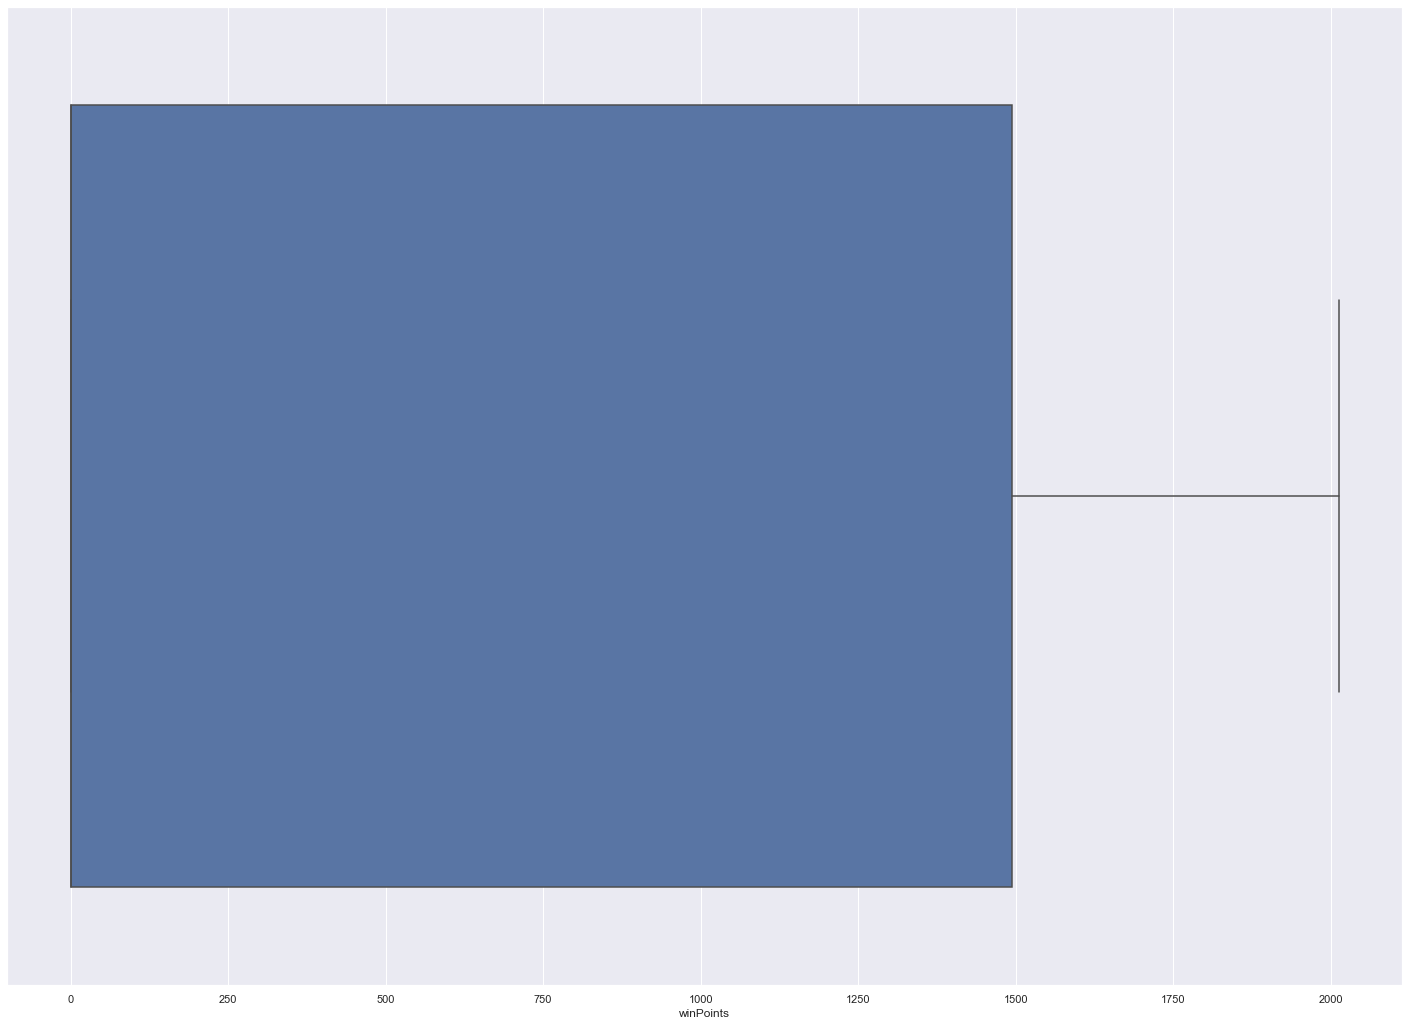

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.000,0.000,0.000,0.000,0.000,0.000,60.000,1241.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,244.800,1.000,1466.000,0.444
1,0.000,0.000,9.564,0.000,0.000,0.000,57.000,0.000,0.000,0.000,...,0.000,0.959,0.000,1.019,0.000,0.000,1434.000,5.000,0.000,0.640
2,1.000,0.000,8.246,0.000,0.000,0.000,47.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,161.800,2.000,0.000,0.775
3,0.000,0.000,5.736,0.000,0.000,0.000,75.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,202.700,3.000,0.000,0.167
4,0.000,0.000,10.000,0.000,0.000,0.000,45.000,0.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,49.750,2.000,0.000,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0.000,0.000,0.000,0.000,0.000,0.000,74.000,1029.000,0.000,0.000,...,0.000,1.058,0.000,0.000,0.000,0.000,1019.000,3.000,1507.000,0.179
4446962,0.000,1.000,6.645,0.000,0.000,0.000,69.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,81.700,6.000,0.000,0.294
4446963,0.000,0.000,7.685,0.000,0.000,0.000,66.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.006,0.000,0.000,788.700,4.000,0.000,0.481
4446964,0.000,4.000,13.431,1.000,1.000,2.000,11.000,0.000,2.000,1.000,...,2.000,0.000,0.000,0.000,0.000,0.000,2748.000,8.000,0.000,0.800


In [111]:
detect_outliers_iqr_max_min(df,"winPoints")

# Visualization 

## I will visualize some columns together to see if there is a relationship between them or not

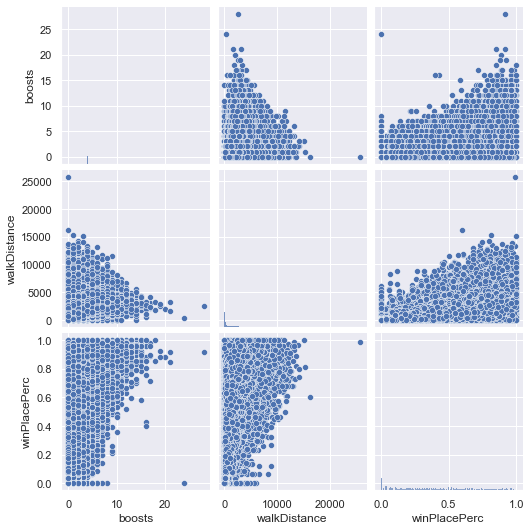

In [30]:
boost_attributes = ["boosts", "walkDistance", "winPlacePerc"]

sns.pairplot(df[boost_attributes]);

In [ ]:
# I can say that some players who didn't knock anyone out have higher dmg due to someone stealing their kills.
# I can say that not all players who are knocked down are killed by the same person who knocked them down.
# I can say that highr dmg in the game means higher kills.
damageDealt_attributes = ["damageDealt", "DBNOs", "headshotKills", "killStreaks","kills","winPlacePerc"]

sns.pairplot(df[damageDealt_attributes]);

In [ ]:
DBNOs_attributes = ["DBNOs","kills",'killStreaks',"winPlacePerc"]
sns.pairplot(df[DBNOs_attributes])

In [ ]:
# I can say that how much you use heal and boosts it well incress your perc in winning :D
# I can say that if you didnt camp in one place and walk throghe the map with smal Distance you will find alot of heals and boosts and know how to serech 
heals_att=["heals","boosts","walkDistance","winPlacePerc"]
sns.pairplot(df[heals_att])

In [ ]:
# I can say that not all players can killstreaks alot and not all the wining players in duo or squad wins without being revived
# I can say that if you have bad killPlace all the time you perc with wining the game is so low
# I can say that if you have a bad killPlace ofCorus, you will most likely have few kills in the game.
# I can say that if you have a bad killPlace ofCorus, you will most likely have few damageDealt in the game
# I can say that if you have a bad killPlace ofCorus, you will most likely have few killStreaks in the game
killplace_att = ["killPlace","damageDealt","kills","killStreaks","winPlacePerc","matchType"]
sns.pairplot(df[killplace_att])

In [ ]:
# I can say that some players did not get a single kill in the game and still have a chance to win..
# I can say that if you have more killpoints, your winpoint will increase. 
killpoint_att=["killPoints","winPoints","winPlacePerc"]
sns.pairplot(df[killpoint_att])

In [ ]:
# i can say that every player in the game that kills above 40 kill is a hacker
# i can say that we have planty of cheater in this game 
kill_att=["kills","killStreaks","longestKill","winPlacePerc"]
sns.pairplot(df[kill_att])

In [ ]:
# i can say that more walking = highestkillplace
walkdistance_att=["walkDistance","kills","killPlace","weaponsAcquired","winPlacePerc"]
sns.pairplot(df[walkdistance_att])

In [ ]:
df.plot(kind="scatter", x="walkDistance", y="damageDealt", alpha=0.3,
             s=df["winPoints"]/100, label="damagedealt_by_walking", figsize=(10,7),
             c="damageDealt", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False);

## Conclusion Of Data Visualization

1- I can say that some players who didn't knock anyone out have higher dmg due to someone stealing their kills.

2- I can say that not all players who are knocked down are killed by the same person who knocked them down.

3- I can say that highr dmg in the game means higher kills.

4- I can say that how much you use heal and boosts it well incress your perc in winning :D.

5- I can say that if you didnt camp in one place and walk throghe the map with smal Distance you will find alot of heals and boosts and know how to serech .

6- I can say that not all players can killstreaks alot and not all the wining players in duo or squad wins without being revived.

7- I can say that if you have bad killPlace all the time your perc in wining the game is so low.

8- I can say that if you have a bad killPlace ofCorus, you will most likely have few kills in the game.

9- I can say that if you have a bad killPlace ofCorus, you will most likely have few damageDealt in the game.

10- I can say that if you have a bad killPlace ofCorus, you will most likely have few killStreaks in the game.

11- i can say that every player in the game that kills above 40 kill is a hacker.

12- i can say that we have planty of cheater in this game .

13- i can say that more walking = highestkillplace.



# cleaning data from hackers & Feature Engineering

In [112]:
# total distance 
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']
df['headshot_rate'] = df['headshotKills'] / df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)


In [113]:
# defining func to draw then drop the values
def perc_and_droping(df,x):
    d=((x.count()/df.count())*100)
    print(x.shape)
    print(d.round(3)[0])
    df.drop(x.index, axis=0, inplace=True)
# def show_countplot(column):
#     plt.figure(figsize=(12,4))
#     sns.countplot(data=df, x=column).set_title(column)
#     plt.show()
# def show_distplot(column):
#     plt.figure(figsize=(12, 4))
#     sns.distplot(df[column], bins=50)
#     plt.show()

# Afk Players

In [114]:
df_afk = df[(df['kills'] == 0 ) & (df['totalDistance'] == 0) & (df['damageDealt'] == 0)]
perc_and_droping(df,df_afk)

(88202, 26)
1.983


# 100% headtshots rate and kills more than 10 in the game ?

In [115]:
headshot_100 =df[(df['headshot_rate'] >= 1) & (df['kills'] >= 10)]
perc_and_droping(df,headshot_100)

(24, 26)
0.001


# If there is anyone who mange to get above 40 kill without healing?!

In [116]:
killing_without_healing=df[(df['kills']>=40) & (df['heals']==0)]
perc_and_droping(df,killing_without_healing)

(5, 26)
0.0


# It is possibale to havae more than 60 weapons with small walkDistance I think not !!!

In [117]:
weaponsAcquired_small_walkDistance=df[(df['weaponsAcquired'] >=60)& (df['walkDistance']<=50)]
perc_and_droping(df,weaponsAcquired_small_walkDistance)

(17, 26)
0.0


# Destroyed vehicles without moving ??

In [118]:
df_vehicleDestroys_without_moving=df[(df['vehicleDestroys']>=0)&(df['totalDistance'] == 0)&(df['damageDealt']== 0)]
perc_and_droping(df,df_vehicleDestroys_without_moving)

(2, 26)
0.0


# More than 40 kill in the game with small Moves no way!!

In [119]:
df_kills_moving_less=df[(df['kills']>40)& (df['totalDistance'] <100)]
perc_and_droping(df,df_kills_moving_less)

(5, 26)
0.0


# revives more than 5 times with zero Distance!!

In [120]:
df_revives_without_moving=df[(df['revives']>=5)&(df['totalDistance'] ==0 )]
perc_and_droping(df,df_revives_without_moving)

(5, 26)
0.0


# More afk conditions

In [40]:
df_killing_all_players=df[(df['killPlace']==100)&(df['totalDistance'] == 0)]
perc_and_droping(df,df_killing_all_players)

(25, 26)
0.001


# Preparning  data For The Models

In [121]:
imputer = SimpleImputer(strategy="median")
df_num = df.drop("matchType", axis=1)
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [122]:
imputer.statistics_

array([0.00000000e+00, 0.00000000e+00, 9.38882351e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.70000000e+01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00000000e+01,
       1.44300000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.27200012e+02,
       3.00000000e+00, 0.00000000e+00, 4.66699988e-01, 7.27599976e+02,
       0.00000000e+00])

In [123]:
df_num.mode().values

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0., 28., -1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.]])

In [124]:
X = imputer.transform(df_num)

In [125]:
df_tr = pd.DataFrame(X, columns=df_num.columns,
                          index=df_num.index)

In [126]:
df['matchType'].value_counts()

squad-fpp           1727643
duo-fpp              981374
squad                612717
solo-fpp             521647
duo                  307044
solo                 173529
normal-squad-fpp      16980
crashfpp               6159
normal-duo-fpp         5453
flaretpp               2429
normal-solo-fpp        1638
flarefpp                701
normal-squad            506
crashtpp                366
normal-solo             322
normal-duo              197
Name: matchType, dtype: int64

In [127]:
df_special_game = df[df['matchType'].isin(['flaretpp','crashfpp','flarefpp','crashtpp'])]
df_noSpecial = df.drop(df_special_game.index.tolist(), axis=0)

In [128]:
df_noSpecial['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'normal-solo-fpp', 'normal-duo-fpp',
       'normal-duo', 'normal-squad', 'normal-solo'], dtype=object)

In [139]:
df_noSpecial = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
df_noSpecial.columns = ["Type","Count"]
df_noSpecial

,Type,Count
0,15,1727643
1,3,981374
2,14,612717
3,13,521647
4,2,307044
5,12,173529
6,11,16980
7,0,6159
8,7,5453
9,5,2429


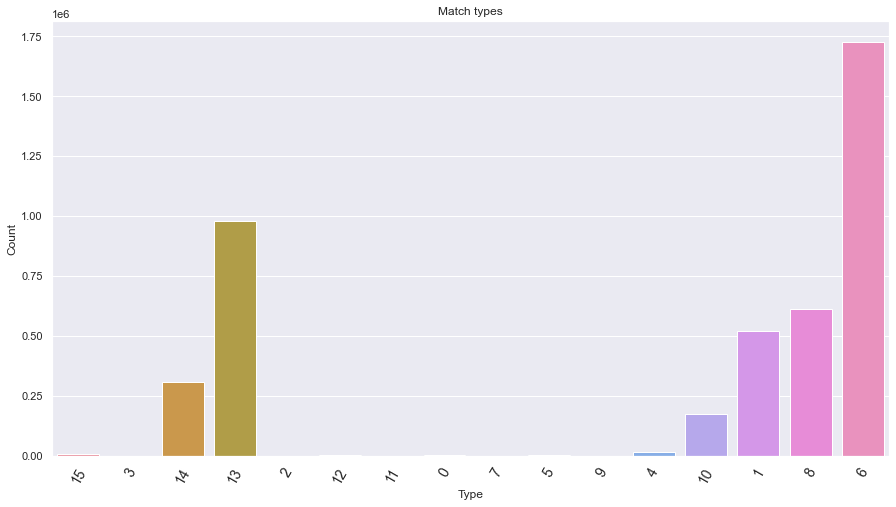

In [140]:
plt.figure(figsize=(15,8))
ticks = df_noSpecial.Type.values
ax = sns.barplot(x="Type", y="Count", data=df_noSpecial)
ax.set_xticklabels(ticks, rotation=60, fontsize=14)
ax.set_title("Match types")
plt.show()

In [49]:
types = df["matchType"].value_counts().to_frame()
Squads = types.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
Duos = types.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
Solo = types.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
my = pd.DataFrame([Squads,Duos, Solo], index=["Squad","Duo","Solo"], columns =["count"])
my

,count
Squad,2077323
Duo,1140426
Solo,615395


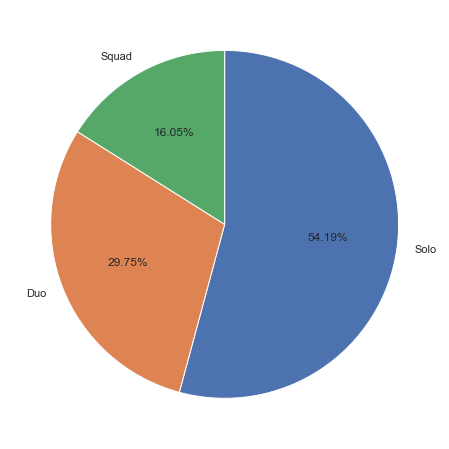

In [50]:
 labels=['Solo','Duo','Squad']
frequency = pd.Series.tolist(my['count'])
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white') 
ax = fig.add_subplot()
ax.pie(frequency,labels=labels,startangle=90,counterclock=False,autopct=lambda p : '{:.2f}%'.format(p))
plt.show()


In [129]:
le=LabelEncoder()
df['matchType']=le.fit_transform(df['matchType'])


In [130]:
my_list = pd.Series.tolist(df['matchType'])
new_list = []
for i in my_list:
    if i not in new_list:
        new_list.append(i)
print(new_list)

[15, 2, 13, 14, 3, 12, 11, 0, 5, 9, 4, 7, 6, 10, 1, 8]


# Training  Models

In [131]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [132]:
#func to print acc and mean_abs
import time
def print_acc_meanerror(g):
        g.fit(x,y)
        s_time_dask = time.time()
        y_train1 = g.predict(x_train)
        accuracy = r2_score(y_train, y_train1)
        print(g ,'r2_score on training data = ',accuracy)
        mae = mean_absolute_error(y_train, y_train1)
        print("mean_abs_error = ",mae)
        e_time_dask = time.time()
        print("Process Time: ", (e_time_dask-s_time_dask), "seconds")
        s_time_dask = time.time()
        y_test1 = g.predict(x_test)
        accuracy = r2_score(y_test, y_test1)
        print(g , 'r2_score on testing data = ',accuracy)
        mae = mean_absolute_error(y_test, y_test1)
        print("mean_abs_error = ",mae)
        e_time_dask = time.time()
        print("Process Time: ", (e_time_dask-s_time_dask), "seconds")
        s_time_dask = time.time()
        y_val1 = g.predict(x_val)
        accuracy = r2_score(y_val, y_val1)
        print(g , 'r2_score on valdation data = ',accuracy)
        mae = mean_absolute_error(y_val, y_val1)
        print("mean_abs_error = ",mae)
        e_time_dask = time.time()
        print("Process Time: ", (e_time_dask-s_time_dask), "seconds")
        

# Model #1

In [133]:
#linear_model
x = df.drop(['winPlacePerc','roadKills','rideDistance','swimDistance','totalDistance','walkDistance','boosts','vehicleDestroys','teamKills','killPlace','winPoints'], axis = 1)
y = df['winPlacePerc']
x_train, x_rem, y_train, y_rem = ms.train_test_split(x, y, train_size = 0.90, random_state = 42)
x_test, x_val, y_test, y_val = ms.train_test_split(x_rem, y_rem, test_size=0.5, random_state=42) 
scaler = preprocessing.StandardScaler(copy=True,with_mean=True).fit_transform(x)
regr = linear_model.LinearRegression()
regr.fit(x, y)
print_acc_meanerror(regr)


LinearRegression()  on train data =  0.46731668734019305
mean_abs_error =  0.17813418679069806
Process Time:  0.3122713565826416 seconds
LinearRegression()  on test data =  0.46326505643625027
mean_abs_error =  0.1781002550137457
Process Time:  0.01810479164123535 seconds
LinearRegression()  on vald data =  0.46993859647603575
mean_abs_error =  0.1780810523576184
Process Time:  0.01961040496826172 seconds


# Model #2

In [135]:
#KNN
KNN = KNeighborsRegressor()
KNN.fit(x, y)
print_acc_meanerror(KNN)

KNeighborsRegressor()  on train data =  0.646008630149411
mean_abs_error =  0.14068893
Process Time:  891.9912261962891 seconds
KNeighborsRegressor()  on test data =  0.6482967301203406
mean_abs_error =  0.14018464
Process Time:  51.27066516876221 seconds
KNeighborsRegressor()  on vald data =  0.6473616124363581
mean_abs_error =  0.14064941
Process Time:  50.190003395080566 seconds


# Model #3

In [ ]:
# error shape to handle it: making sure from variables
#DT
DT = DecisionTreeRegressor(max_depth=74,max_leaf_nodes=10000000)
DT.fit(x, y)
print_acc_meanerror(DT)

# Model #4

In [ ]:
#RF
RF = RandomForestRegressor()
RF.fit(x, y)
print_acc_meanerror(RF)

## My best model is DT

# Fine tune the best Model

### best max depth for DT is 74

In [ ]:
# for i in range (70,75,1):
#     DT = DecisionTreeRegressor(max_depth=i)
#     DT.fit(x, y)
#     print_acc_meanerror(DT)
#     print(i)

DecisionTreeRegressor(max_depth=70)  on train data =  0.9318851613843462
mean_abs_error =  0.027884360370832917
DecisionTreeRegressor(max_depth=70)  on test data =  0.931325503751279
mean_abs_error =  0.028150484420961724
DecisionTreeRegressor(max_depth=70)  on vald data =  0.9326396661516044
mean_abs_error =  0.027587198430062486
70
DecisionTreeRegressor(max_depth=71)  on train data =  0.9318878180484311
mean_abs_error =  0.027882734444126114
DecisionTreeRegressor(max_depth=71)  on test data =  0.9313290616782337
mean_abs_error =  0.0281481591824602
DecisionTreeRegressor(max_depth=71)  on vald data =  0.9326439011554093
mean_abs_error =  0.027584128908260147
71
DecisionTreeRegressor(max_depth=72)  on train data =  0.9318900122595144
mean_abs_error =  0.027881082466980615
DecisionTreeRegressor(max_depth=72)  on test data =  0.9313318632049075
mean_abs_error =  0.02814572008770388
DecisionTreeRegressor(max_depth=72)  on vald data =  0.9326449633301126
mean_abs_error =  0.027583280515473374
72
DecisionTreeRegressor(max_depth=73)  on train data =  0.9318904777500403
mean_abs_error =  0.02788044124754598
DecisionTreeRegressor(max_depth=73)  on test data =  0.9313319957944438
mean_abs_error =  0.02814549374458478
DecisionTreeRegressor(max_depth=73)  on vald data =  0.9326458311054364
mean_abs_error =  0.02758228533431079
73
DecisionTreeRegressor(max_depth=74)  on train data =  0.9318907394352095
mean_abs_error =  0.027880088188004512
DecisionTreeRegressor(max_depth=74)  on test data =  0.9313321112747821
mean_abs_error =  0.02814541015204451
DecisionTreeRegressor(max_depth=74)  on vald data =  0.9326465146133841
mean_abs_error =  0.027581307960660488
74

### best max leaf is 10000000

In [ ]:
# for i in range (10000000,100000000,10000000):
#     DT = DecisionTreeRegressor(max_depth=74,max_leaf_nodes=10000000)
#     DT.fit(x, y)
#     print_acc_meanerror(DT)
#     print(i)

DecisionTreeRegressor(max_depth=74, max_leaf_nodes=10000000)  on train data =  0.9318907394352095
mean_abs_error =  0.027880088188004512
DecisionTreeRegressor(max_depth=74, max_leaf_nodes=10000000)  on test data =  0.9313321112747821
mean_abs_error =  0.02814541015204451
DecisionTreeRegressor(max_depth=74, max_leaf_nodes=10000000)  on vald data =  0.9326465146133841
mean_abs_error =  0.027581307960660488
10000000

DecisionTreeRegressor(max_depth=74, max_leaf_nodes=20000000)  on train data =  0.9318907394352095
mean_abs_error =  0.027880088188004512
DecisionTreeRegressor(max_depth=74, max_leaf_nodes=20000000)  on test data =  0.9313321112747821
mean_abs_error =  0.02814541015204451
DecisionTreeRegressor(max_depth=74, max_leaf_nodes=20000000)  on vald data =  0.9326465146133841
mean_abs_error =  0.027581307960660488
20000000

DecisionTreeRegressor(max_depth=74, max_leaf_nodes=30000000)  on train data =  0.9318907394352095
mean_abs_error =  0.027880088188004512
DecisionTreeRegressor(max_depth=74, max_leaf_nodes=30000000)  on test data =  0.9313321112747821
mean_abs_error =  0.02814541015204451
DecisionTreeRegressor(max_depth=74, max_leaf_nodes=30000000)  on vald data =  0.9326465146133841
mean_abs_error =  0.027581307960660488
30000000

In [ ]:
# DT = DecisionTreeRegressor(max_depth=74,max_leaf_nodes=10000000)
# DT.fit(x, y)
# print_acc_meanerror(DT)
# print(i)